# EXPLORATION DES DATASETS 

## IRIS

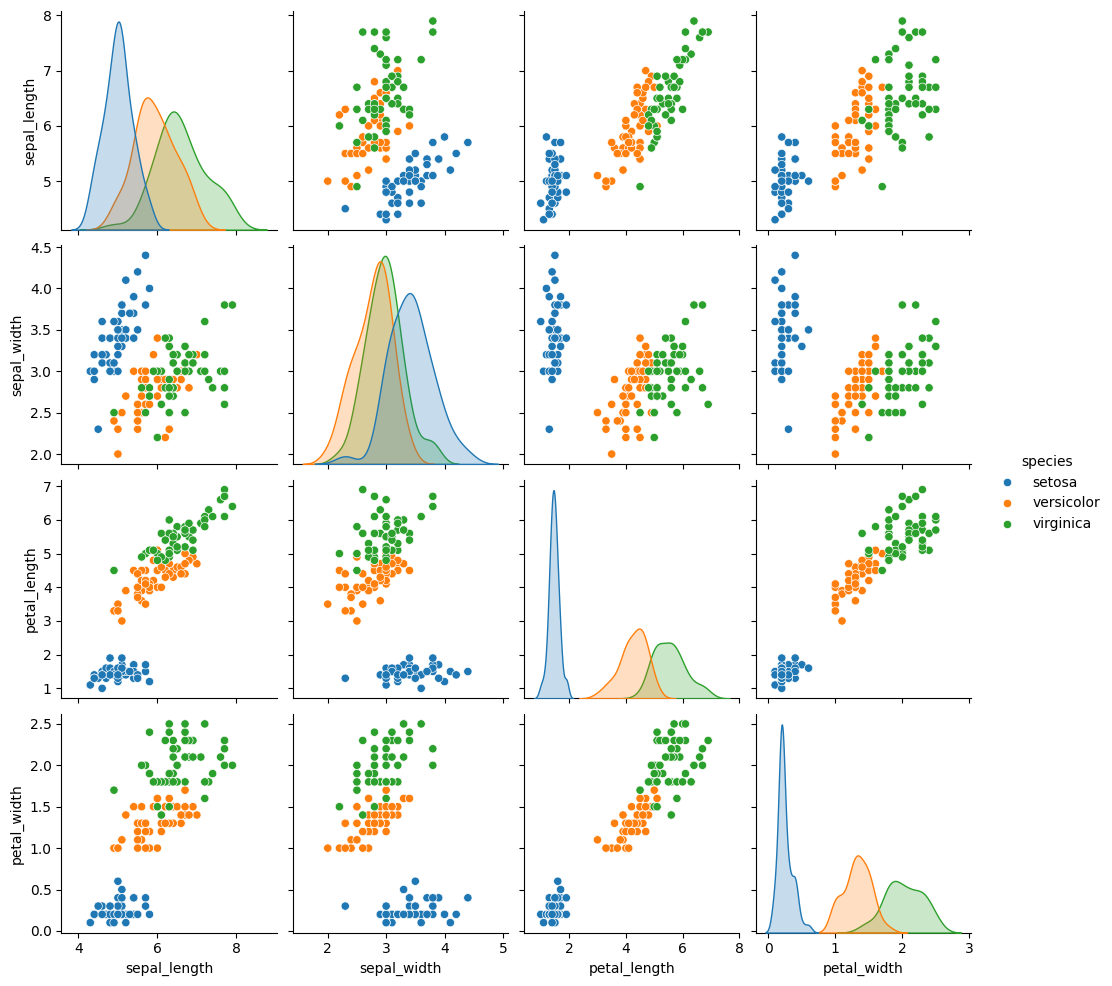

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset('iris')
# Plot all pairwise relationships
sns.pairplot(iris, hue='species')
plt.show()


## MNIST 786

Chargement du dataset MNIST...
Forme du dataset: (70000, 784)
Nombre d'échantillons: 70000, Nombre de caractéristiques: 784
Prétraitement des données...
Application de la PCA pour la visualisation...


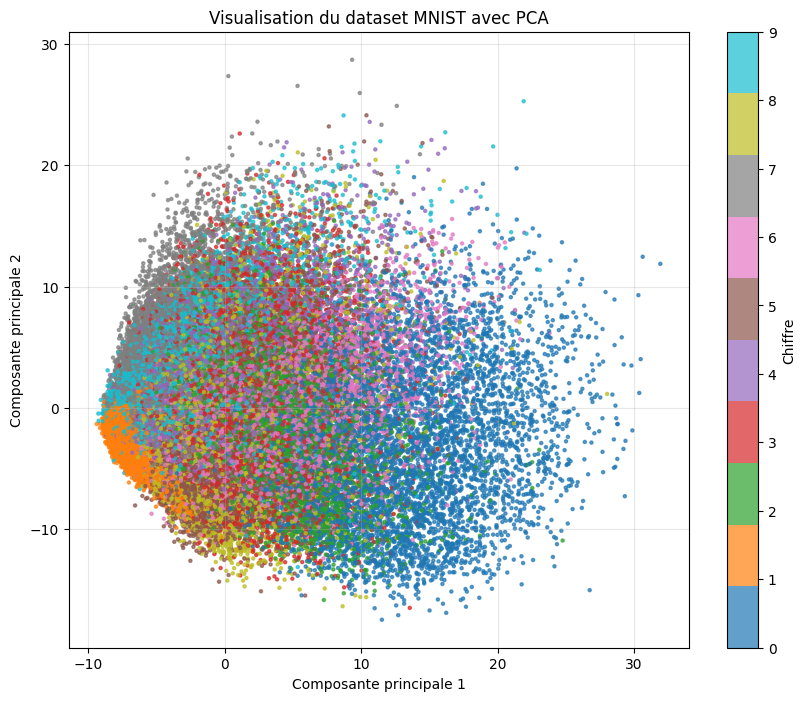

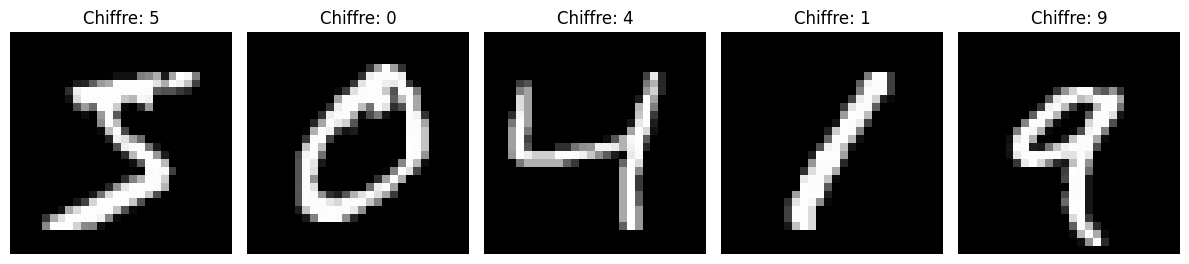

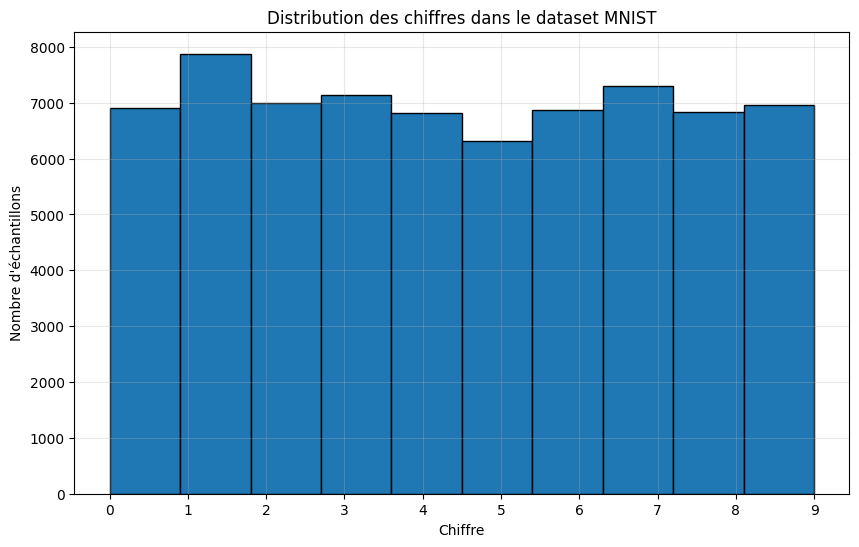

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Importer le dataset MNIST
print("Chargement du dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)
print(f"Forme du dataset: {X.shape}")
print(f"Nombre d'échantillons: {X.shape[0]}, Nombre de caractéristiques: {X.shape[1]}")

# Prétraitement des données
print("Prétraitement des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension avec PCA pour la visualisation
print("Application de la PCA pour la visualisation...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des données avec les vraies étiquettes
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=5, alpha=0.7)
plt.colorbar(scatter, label='Chiffre')
plt.title('Visualisation du dataset MNIST avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True, alpha=0.3)
plt.savefig('mnist_visualization.png', dpi=300)
plt.show()

# Afficher quelques exemples d'images
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Chiffre: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_examples.png', dpi=300)
plt.show()

# Afficher la distribution des classes
plt.figure(figsize=(10, 6))
plt.hist(y, bins=10, edgecolor='black')
plt.title('Distribution des chiffres dans le dataset MNIST')
plt.xlabel('Chiffre')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(range(10))
plt.grid(True, alpha=0.3)
plt.savefig('mnist_distribution.png', dpi=300)
plt.show()

## Breast Cancer dataset

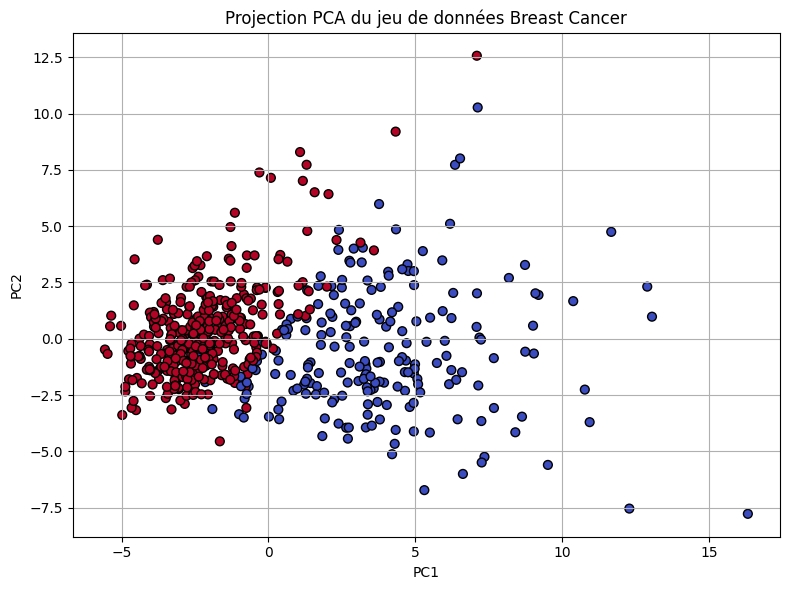

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement des données
data = load_breast_cancer()
X = data.data
y = data.target

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Projection en 2D avec PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title("Projection PCA du jeu de données Breast Cancer")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


# EXECUTION DE LA CLASSIFICATION SUR LES 3 DATASET 

## IRIS - KMEANS 

Accuracy: 0.8333333333333334
Precision (macro): 0.8339355011374282
Recall (macro): 0.8333333333333334
F1-score (macro): 0.8331831982117239


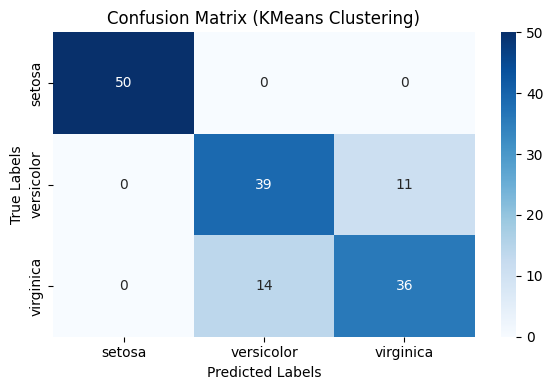

In [ ]:
# Kmeans sur IRIS 
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Map each cluster to the most common true label (majority voting)
labels = np.zeros_like(y_kmeans)
for cluster in range(3):
    mask = (y_kmeans == cluster)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

# Evaluate performance
print("Accuracy:", accuracy_score(y_true, labels))
print("Precision (macro):", precision_score(y_true, labels, average='macro'))
print("Recall (macro):", recall_score(y_true, labels, average='macro'))
print("F1-score (macro):", f1_score(y_true, labels, average='macro'))
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_true, labels)

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KMeans Clustering)')
plt.tight_layout()
plt.show()



## IRIS-KMEDOID

Accuracy :         0.84
Precision (macro) : 0.8425324675324676
Recall (macro)    : 0.8399999999999999
F1-score (macro)  : 0.839421918908069


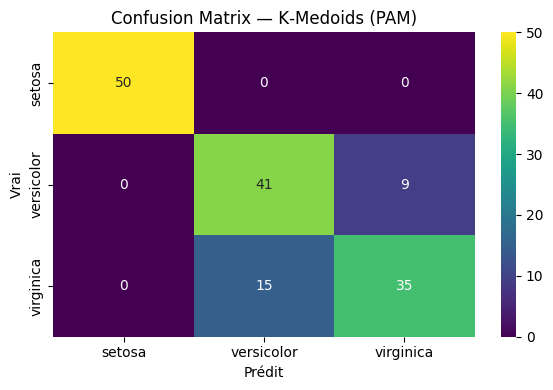

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt

def kmedoids_pam(X, k, max_iter=100):
    """
    Partitioning Around Medoids (PAM) basique.
    - X : données (n_samples × n_features)
    - k : nombre de medoids
    """
    n = X.shape[0]
    # 1. Initialisation aléatoire des indices de medoids
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx]
    
    for _ in range(max_iter):
        # 2. Assignation : chaque point au medoid le plus proche
        dist = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(dist, axis=1)
        
        # 3. Mise à jour de chaque medoid
        updated = False
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            # calcul du coût total pour chaque candidat medoid
            D = np.sum(
                np.linalg.norm(cluster_points[:, None] - cluster_points[None, :], axis=2),
                axis=1
            )
            best = np.argmin(D)
            if not np.allclose(medoids[i], cluster_points[best]):
                medoids[i] = cluster_points[best]
                updated = True
        
        # arrêt si pas de changement
        if not updated:
            break
    
    # Étiquette finale
    dist = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(dist, axis=1), medoids

# ——— Chargement et pré‑traitement
iris = load_iris()
X = iris.data
y_true = iris.target
X_scaled = StandardScaler().fit_transform(X)

# ——— Exécution de PAM
y_clusters, medoids = kmedoids_pam(X_scaled, k=3, max_iter=100)

# ——— Remappage des clusters vers les vraies classes
labels = np.zeros_like(y_clusters)
for cl in np.unique(y_clusters):
    mask = (y_clusters == cl)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

# ——— Évaluation
print("Accuracy :        ", accuracy_score(y_true, labels))
print("Precision (macro) :", precision_score(y_true, labels, average='macro'))
print("Recall (macro)    :", recall_score(y_true, labels, average='macro'))
print("F1-score (macro)  :", f1_score(y_true, labels, average='macro'))

# ——— Matrice de confusion en heatmap
cm = confusion_matrix(y_true, labels)
plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title('Confusion Matrix — K‑Medoids (PAM)')
plt.tight_layout()
plt.show()


## IRIS-HYBRIDE 1 

Accuracy :        0.8466666666666667
Precision (macro): 0.8701944821347807
Recall (macro):    0.8466666666666667
F1-score (macro):  0.8421034565612878


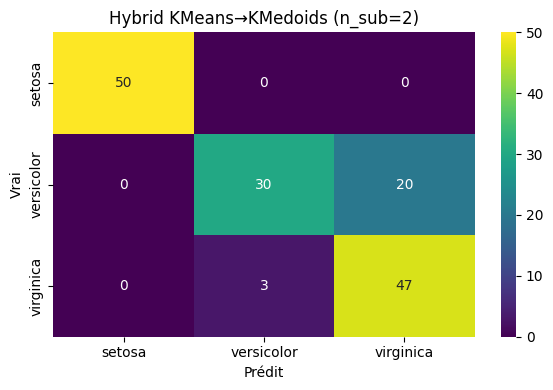

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt

def kmedoids_pam(X, k, max_iter=100):
    """
    Partitioning Around Medoids (PAM) basique.
    - X : array (n_samples × n_features)
    - k : nombre de medoids à extraire
    """
    n = X.shape[0]
    # 1) initialisation aléatoire des medoids
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()

    for _ in range(max_iter):
        # 2) assignation de chaque point au medoid le plus proche
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)

        updated = False
        # 3) pour chaque cluster, chercher le point minimisant la somme des distances
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            # coût total si chaque point du cluster était medoid
            intra_dist = np.sum(
                np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2),
                axis=1
            )
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True

        if not updated:
            break

    # dernière assignation
    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(D_final, axis=1), medoids

def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    """
    1) On découpe X en n_subsets sous‑ensembles (aléatoire, tailles ≈ égales)
    2) Sur chaque subset, on lance KMeans(n_clusters), on stocke ses centres
    3) On regroupe tous les centres et lance PAM(kmedoids) pour en extraire n_clusters medoids
    4) On réaffecte chaque point de X au medoid global le plus proche → labels finaux
    """
    np.random.seed(random_state)
    # shuffle + split
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)

    # 1) KMeans sur chaque split
    local_centers = []
    for sub_idx in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)  # shape = (n_subsets * n_clusters, n_features)

    # 2) K‑Medoids sur les centres
    _, medoids = kmedoids_pam(C, k=n_clusters)

    # 3) Assignation finale
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    return labels, medoids

# ——— Application sur Iris
iris = load_iris()
X = iris.data
y_true = iris.target

# normalisation
X_scaled = StandardScaler().fit_transform(X)

# paramètres
n_subsets  = 2    # vous pouvez changer à volonté
n_clusters = 3     # typiquement 3 pour Iris

# exécution
y_pred, medoids = hybrid_kmeans_kmedoids(X_scaled, n_subsets, n_clusters)

# réalignement clusters → classes (vote majoritaire)
labels = np.zeros_like(y_pred)
for cl in range(n_clusters):
    mask = (y_pred == cl)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

# évaluation
print("Accuracy :       ", accuracy_score(y_true, labels))
print("Precision (macro):", precision_score(y_true, labels, average='macro'))
print("Recall (macro):   ", recall_score(y_true, labels, average='macro'))
print("F1-score (macro): ", f1_score(y_true, labels, average='macro'))

# heatmap de la matrice de confusion
cm = confusion_matrix(y_true, labels)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title(f'Hybrid KMeans→KMedoids (n_sub={n_subsets})')
plt.tight_layout()
plt.show()


## VERIFIER L EFFET DU NOMBRE DE SUBSET SUR LA PERFORMANCE DU MODELE :
### TROUVONS LE MEILLEUR n_subsets POUR UNE PERF MAXIMAL

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from scipy.stats import mode


def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()

    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(
                np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2),
                axis=1
            )
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break

    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(D_final, axis=1), medoids


def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    local_centers = []
    for sub_idx in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)
    _, medoids = kmedoids_pam(C, k=n_clusters)
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    return labels, medoids


# Load and normalize data
iris = load_iris()
X = iris.data
y_true = iris.target
X_scaled = StandardScaler().fit_transform(X)

# Iterate over n_subsets from 2 to 10
results = []

for n_subsets in range(2, 11):
    y_pred, medoids = hybrid_kmeans_kmedoids(X_scaled, n_subsets, n_clusters=3)
    labels = np.zeros_like(y_pred)
    for cl in range(3):
        mask = (y_pred == cl)
        labels[mask] = mode(y_true[mask], keepdims=True)[0]
    
    acc = accuracy_score(y_true, labels)
    prec = precision_score(y_true, labels, average='macro')
    rec = recall_score(y_true, labels, average='macro')
    f1 = f1_score(y_true, labels, average='macro')
    
    results.append({
        'n_subsets': int(n_subsets),
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

# Display results in table
results_df = pd.DataFrame(results)
results_df.style.format("{:.4f}")


c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

## MNIST 786 - KMEANS 

Chargement du dataset MNIST...
Forme du dataset: (70000, 784)
Utilisation d'un sous-ensemble de 70000 échantillons
Normalisation des données...
Application de K-means avec 10 clusters...
Affectation des étiquettes par vote majoritaire...

----- Métriques d'évaluation -----
Accuracy: 0.5273571428571429
Precision (macro): 0.4452070361899992
Recall (macro): 0.5191803603415901
F1-score (macro): 0.4689441338572541


c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


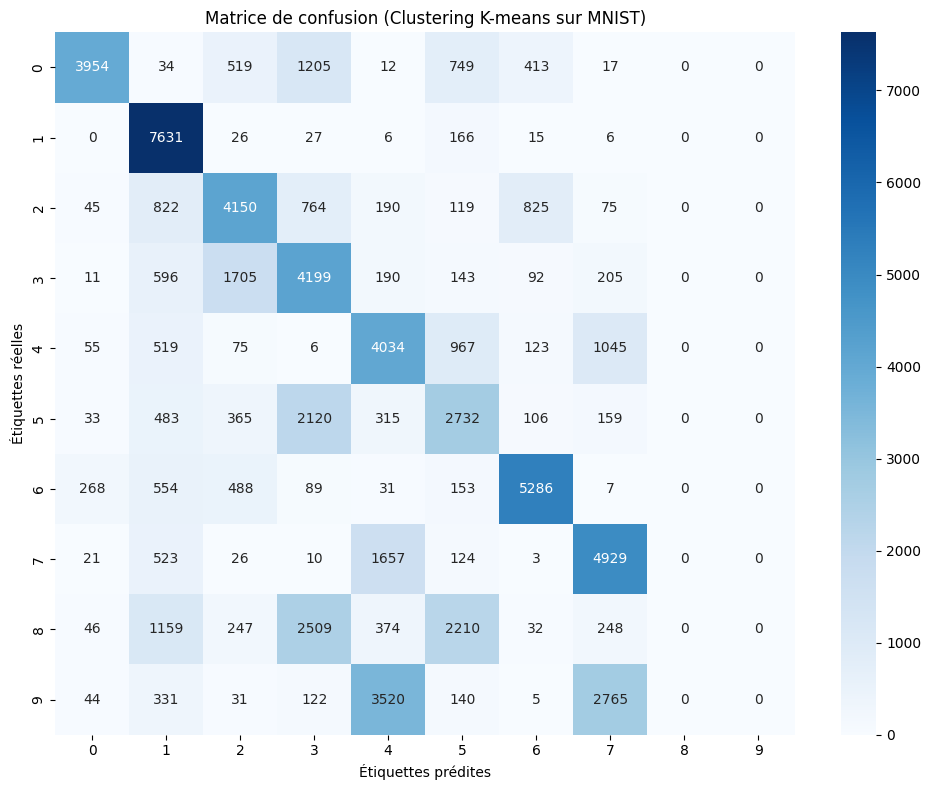

C:\Users\rizd\AppData\Local\Temp\ipykernel_10444\2098613357.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Cluster {i}\nÉtiquette: {int(mode(y_true_sample[y_kmeans == i], keepdims=True)[0])}')


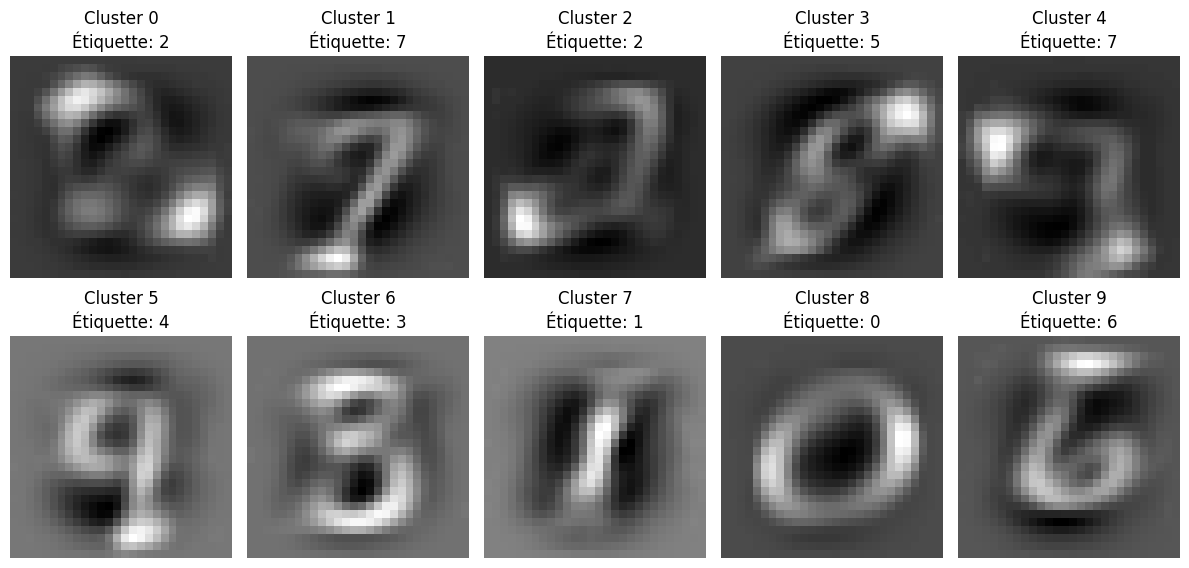

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler

# Charger le dataset MNIST
print("Chargement du dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y_true = mnist.target.astype(int)
print(f"Forme du dataset: {X.shape}")

# Comme MNIST est très grand, nous pouvons utiliser un sous-ensemble pour accélérer le traitement
# Vous pouvez ajuster la taille selon votre capacité de calcul
sample_size = 70000  # Utilisez un nombre plus grand si vous avez assez de RAM et de temps
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]
y_true_sample = y_true[indices]

print(f"Utilisation d'un sous-ensemble de {sample_size} échantillons")

# Normaliser les caractéristiques
print("Normalisation des données...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Appliquer le clustering K-means (MNIST a 10 classes pour les chiffres 0-9)
print("Application de K-means avec 10 clusters...")
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Mapper chaque cluster à l'étiquette vraie la plus courante (vote majoritaire)
print("Affectation des étiquettes par vote majoritaire...")
labels = np.zeros_like(y_kmeans)
for cluster in range(10):
    mask = (y_kmeans == cluster)
    if np.any(mask):  # S'assurer que le cluster n'est pas vide
        labels[mask] = mode(y_true_sample[mask], keepdims=True)[0]

# Évaluer les performances
print("\n----- Métriques d'évaluation -----")
print("Accuracy:", accuracy_score(y_true_sample, labels))
print("Precision (macro):", precision_score(y_true_sample, labels, average='macro'))
print("Recall (macro):", recall_score(y_true_sample, labels, average='macro'))
print("F1-score (macro):", f1_score(y_true_sample, labels, average='macro'))

# Calculer la matrice de confusion
cm = confusion_matrix(y_true_sample, labels)

# Afficher comme heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de confusion (Clustering K-means sur MNIST)')
plt.tight_layout()
plt.savefig('confusion_matrix_kmeans_mnist.png', dpi=300)
plt.show()

# Visualiser les centroïdes (moyenne de chaque cluster)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Récupérer le centroïde et le transformer en image 28x28
    centroid = kmeans.cluster_centers_[i].reshape(28, 28)
    plt.imshow(centroid, cmap='gray')
    plt.title(f'Cluster {i}\nÉtiquette: {int(mode(y_true_sample[y_kmeans == i], keepdims=True)[0])}')
    plt.axis('off')
plt.tight_layout()
plt.savefig('kmeans_centroids_mnist.png', dpi=300)
plt.show()



## MNIST 786 - KMEDOID 

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
import time

def kmedoids_pam(X, k, max_iter=100):
    """
    Partitioning Around Medoids (PAM) basique.
    - X : données (n_samples × n_features)
    - k : nombre de medoids
    """
    n = X.shape[0]
    # 1. Initialisation aléatoire des indices de medoids
    np.random.seed(42)  # Pour reproductibilité
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx]
    
    for iter_num in range(max_iter):
        print(f"Itération PAM {iter_num+1}/{max_iter}")
        # 2. Assignation : chaque point au medoid le plus proche
        dist = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(dist, axis=1)
        
        # 3. Mise à jour de chaque medoid
        updated = False
        for i in range(k):
            cluster_points_idx = np.where(labels == i)[0]
            if len(cluster_points_idx) == 0:
                continue
                
            cluster_points = X[cluster_points_idx]
            
            # Pour chaque point dans le cluster, calculer la somme des distances
            # aux autres points du cluster
            min_total_dist = float('inf')
            new_medoid_idx = -1
            
            # Pour accélérer, nous n'examinerons qu'un sous-ensemble de points comme candidats
            # si le cluster est très grand
            if len(cluster_points_idx) > 100:
                candidate_indices = np.random.choice(len(cluster_points_idx), 100, replace=False)
            else:
                candidate_indices = range(len(cluster_points_idx))
                
            for idx in candidate_indices:
                point_idx = cluster_points_idx[idx]
                # Calculer la somme des distances entre ce point et tous les autres du même cluster
                total_dist = np.sum(np.linalg.norm(X[point_idx] - cluster_points, axis=1))
                if total_dist < min_total_dist:
                    min_total_dist = total_dist
                    new_medoid_idx = point_idx
            
            if new_medoid_idx != -1 and not np.array_equal(medoids[i], X[new_medoid_idx]):
                medoids[i] = X[new_medoid_idx]
                updated = True
        
        # arrêt si pas de changement
        if not updated:
            print(f"Convergence atteinte après {iter_num+1} itérations")
            break
    
    # Étiquette finale
    dist = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(dist, axis=1), medoids, medoid_idx

# ——— Chargement et pré‑traitement
print("Chargement du dataset MNIST...")
start_time = time.time()
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y_true = mnist.target.astype(int)
print(f"Temps de chargement: {time.time() - start_time:.2f} secondes")
print(f"Forme du dataset: {X.shape}")

# Utiliser un sous-ensemble pour accélérer le calcul (PAM est très lent)
print("Échantillonnage et prétraitement...")
sample_size = 70000  # PAM est beaucoup plus lent que k-means, donc utiliser un petit échantillon
np.random.seed(42)
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]
y_true_sample = y_true[indices]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# ——— Exécution de PAM
print(f"Exécution de PAM avec k=10 sur {sample_size} échantillons...")
start_time = time.time()
y_clusters, medoids, medoid_indices = kmedoids_pam(X_scaled, k=10, max_iter=20)
execution_time = time.time() - start_time
print(f"Temps d'exécution PAM: {execution_time:.2f} secondes")

# ——— Remappage des clusters vers les vraies classes
print("Remappage des clusters...")
labels = np.zeros_like(y_clusters)
for cl in np.unique(y_clusters):
    mask = (y_clusters == cl)
    if np.any(mask):  # S'assurer que le cluster n'est pas vide
        labels[mask] = mode(y_true_sample[mask], keepdims=True)[0]

# ——— Évaluation
print("\n----- Métriques d'évaluation -----")
print("Accuracy :        ", accuracy_score(y_true_sample, labels))
print("Precision (macro) :", precision_score(y_true_sample, labels, average='macro'))
print("Recall (macro)    :", recall_score(y_true_sample, labels, average='macro'))
print("F1-score (macro)  :", f1_score(y_true_sample, labels, average='macro'))

# ——— Matrice de confusion en heatmap
cm = confusion_matrix(y_true_sample, labels)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis',
    xticklabels=range(10),
    yticklabels=range(10)
)
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title('Matrice de confusion — K‑Medoids (PAM) sur MNIST')
plt.tight_layout()
plt.savefig('confusion_matrix_kmedoids_mnist.png', dpi=300)
plt.show()

# Visualiser les médoïdes
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Récupérer le médoïde et le transformer en image 28x28
    idx = indices[medoid_indices[i]]  # Convertir l'indice local en indice global
    medoid_image = X[idx].reshape(28, 28)
    plt.imshow(medoid_image, cmap='gray')
    cluster_label = int(mode(y_true_sample[y_clusters == i], keepdims=True)[0])
    plt.title(f'Cluster {i}\nÉtiquette: {cluster_label}')
    plt.axis('off')
plt.tight_layout()
plt.savefig('kmedoids_medoids_mnist.png', dpi=300)
plt.show()


Chargement du dataset MNIST...
Temps de chargement: 6.77 secondes
Forme du dataset: (70000, 784)
Échantillonnage et prétraitement...
Exécution de PAM avec k=10 sur 70000 échantillons...
Itération PAM 1/20


## MNIST 786 - Hybridation 1 DEFINITION 

Chargement du dataset MNIST...
Temps de chargement: 6.55 secondes
Forme du dataset: (70000, 784)
Échantillonnage et prétraitement...
Exécution de la méthode hybride sur 70000 échantillons...
Démarrage de la méthode hybride avec 10 sous-ensembles et 10 clusters
Étape 1: KMeans sur chaque sous-ensemble
  KMeans sur sous-ensemble 1/10 (taille: 7000)
  KMeans sur sous-ensemble 2/10 (taille: 7000)
  KMeans sur sous-ensemble 3/10 (taille: 7000)
  KMeans sur sous-ensemble 4/10 (taille: 7000)
  KMeans sur sous-ensemble 5/10 (taille: 7000)
  KMeans sur sous-ensemble 6/10 (taille: 7000)
  KMeans sur sous-ensemble 7/10 (taille: 7000)
  KMeans sur sous-ensemble 8/10 (taille: 7000)
  KMeans sur sous-ensemble 9/10 (taille: 7000)
  KMeans sur sous-ensemble 10/10 (taille: 7000)
Centres KMeans générés: (100, 784)
Étape 2: PAM sur les centres de KMeans
Itération PAM 1/50
Itération PAM 2/50
Convergence atteinte après 2 itérations
Étape 3: Assignation finale des points aux medoids
Temps total d'exécution:

c:\Users\rizd\Desktop\Odyssey\ZEENV\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall (macro)    : 0.4243089449327023
F1-score (macro)  : 0.3880868499582052


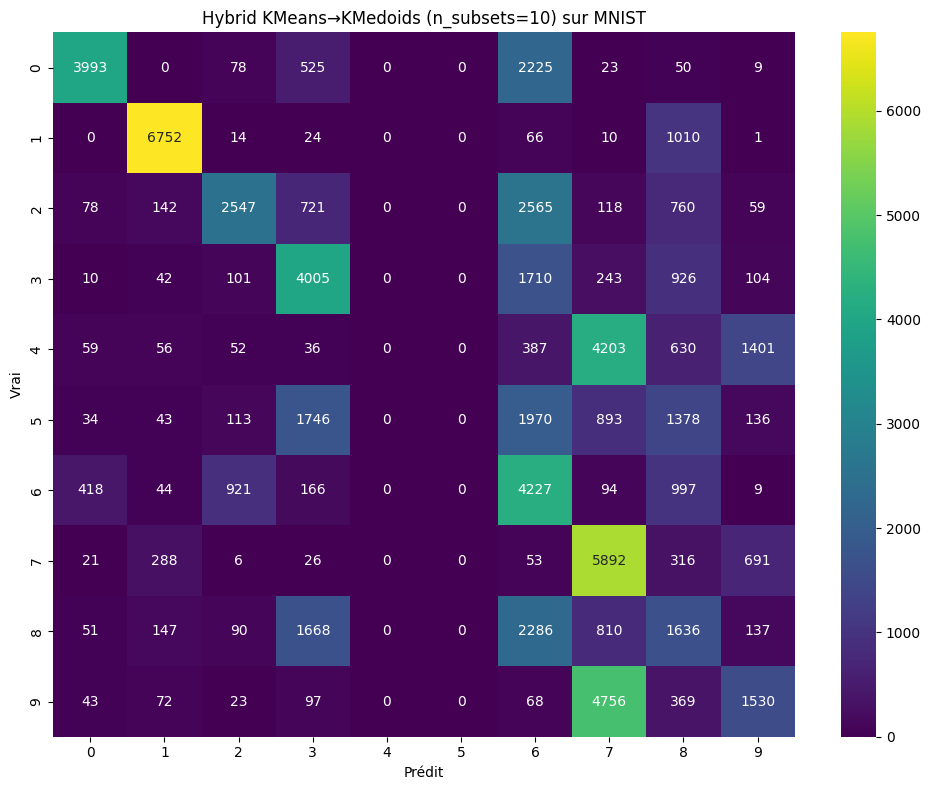

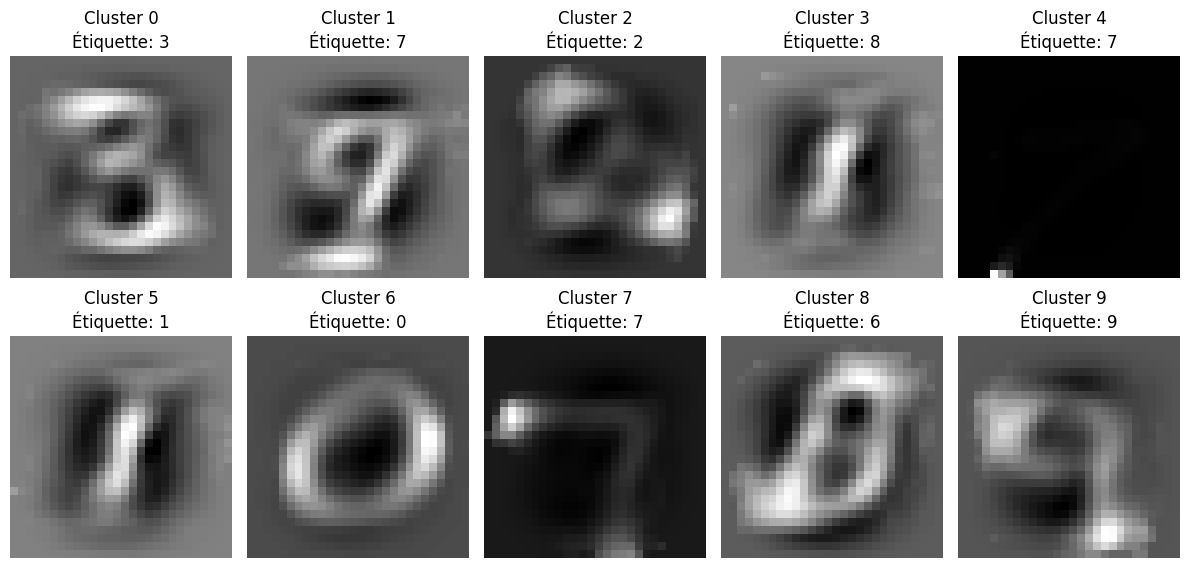

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
import time

def kmedoids_pam(X, k, max_iter=100):
    """
    Partitioning Around Medoids (PAM) basique.
    - X : array (n_samples × n_features)
    - k : nombre de medoids à extraire
    """
    n = X.shape[0]
    # 1) initialisation aléatoire des medoids
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()

    for iter_num in range(max_iter):
        print(f"Itération PAM {iter_num+1}/{max_iter}")
        # 2) assignation de chaque point au medoid le plus proche
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)

        updated = False
        # 3) pour chaque cluster, chercher le point minimisant la somme des distances
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            # coût total si chaque point du cluster était medoid
            intra_dist = np.sum(
                np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2),
                axis=1
            )
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True

        if not updated:
            print(f"Convergence atteinte après {iter_num+1} itérations")
            break

    # dernière assignation
    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    final_labels = np.argmin(D_final, axis=1)
    
    # Trouver les indices des medoids dans X
    medoid_indices = []
    for m in medoids:
        # Trouver l'indice du point dans X qui correspond au medoid
        # Utiliser une tolérance pour les erreurs de précision flottante
        matches = np.where(np.all(np.isclose(X, m), axis=1))[0]
        if len(matches) > 0:
            medoid_indices.append(matches[0])
        else:
            # Si aucun point ne correspond exactement, prendre le plus proche
            dist = np.linalg.norm(X - m, axis=1)
            medoid_indices.append(np.argmin(dist))
            
    return final_labels, medoids, np.array(medoid_indices)

def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    """
    1) On découpe X en n_subsets sous‑ensembles (aléatoire, tailles ≈ égales)
    2) Sur chaque subset, on lance KMeans(n_clusters), on stocke ses centres
    3) On regroupe tous les centres et lance PAM(kmedoids) pour en extraire n_clusters medoids
    4) On réaffecte chaque point de X au medoid global le plus proche → labels finaux
    """
    np.random.seed(random_state)
    start_time = time.time()
    print(f"Démarrage de la méthode hybride avec {n_subsets} sous-ensembles et {n_clusters} clusters")
    
    # shuffle + split
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)

    # 1) KMeans sur chaque split
    print("Étape 1: KMeans sur chaque sous-ensemble")
    local_centers = []
    for i, sub_idx in enumerate(splits):
        print(f"  KMeans sur sous-ensemble {i+1}/{n_subsets} (taille: {len(sub_idx)})")
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10).fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)  # shape = (n_subsets * n_clusters, n_features)
    print(f"Centres KMeans générés: {C.shape}")

    # 2) K‑Medoids sur les centres
    print("Étape 2: PAM sur les centres de KMeans")
    _, medoids, _ = kmedoids_pam(C, k=n_clusters, max_iter=50)

    # 3) Assignation finale
    print("Étape 3: Assignation finale des points aux medoids")
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    
    total_time = time.time() - start_time
    print(f"Temps total d'exécution: {total_time:.2f} secondes")
    return labels, medoids

# ——— Chargement et prétraitement du dataset MNIST
print("Chargement du dataset MNIST...")
start_time = time.time()
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y_true = mnist.target.astype(int)
print(f"Temps de chargement: {time.time() - start_time:.2f} secondes")
print(f"Forme du dataset: {X.shape}")

# Utiliser un sous-ensemble pour accélérer le calcul
print("Échantillonnage et prétraitement...")
sample_size = 70000  # Nous pouvons prendre plus d'échantillons car la méthode hybride est plus efficace
np.random.seed(42)
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]
y_true_sample = y_true[indices]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# ——— Paramètres pour MNIST
n_subsets = 10    # Découper en 10 sous-ensembles
n_clusters = 10   # MNIST a 10 classes (chiffres 0-9)

# ——— Exécution de la méthode hybride
print(f"Exécution de la méthode hybride sur {sample_size} échantillons...")
y_pred, medoids = hybrid_kmeans_kmedoids(X_scaled, n_subsets, n_clusters, random_state=42)

# ——— Réalignement clusters → classes (vote majoritaire)
print("Réalignement des clusters aux classes réelles...")
labels = np.zeros_like(y_pred)
for cl in range(n_clusters):
    mask = (y_pred == cl)
    if np.any(mask):  # S'assurer que le cluster n'est pas vide
        labels[mask] = mode(y_true_sample[mask], keepdims=True)[0]

# ——— Évaluation
print("\n----- Métriques d'évaluation -----")
print("Accuracy :        ", accuracy_score(y_true_sample, labels))
print("Precision (macro) :", precision_score(y_true_sample, labels, average='macro'))
print("Recall (macro)    :", recall_score(y_true_sample, labels, average='macro'))
print("F1-score (macro)  :", f1_score(y_true_sample, labels, average='macro'))

# ——— Matrice de confusion en heatmap
cm = confusion_matrix(y_true_sample, labels)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis',
    xticklabels=range(10),
    yticklabels=range(10)
)
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title(f'Hybrid KMeans→KMedoids (n_subsets={n_subsets}) sur MNIST')
plt.tight_layout()
plt.savefig('confusion_matrix_hybrid_mnist.png', dpi=300)
plt.show()

# ——— Visualiser les medoids finaux
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.subplot(2, 5, i+1)
    
    # Transformer le medoid en image 28x28
    medoid_image = medoids[i].reshape(28, 28)
    plt.imshow(medoid_image, cmap='gray')
    
    # Trouver l'étiquette majoritaire pour ce cluster
    cluster_label = int(mode(y_true_sample[y_pred == i], keepdims=True)[0])
    plt.title(f'Cluster {i}\nÉtiquette: {cluster_label}')
    plt.axis('off')
plt.tight_layout()
plt.savefig('hybrid_medoids_mnist.png', dpi=300)
plt.show()



## breast cancer dataset - KMEANS, KMEDOID - H1

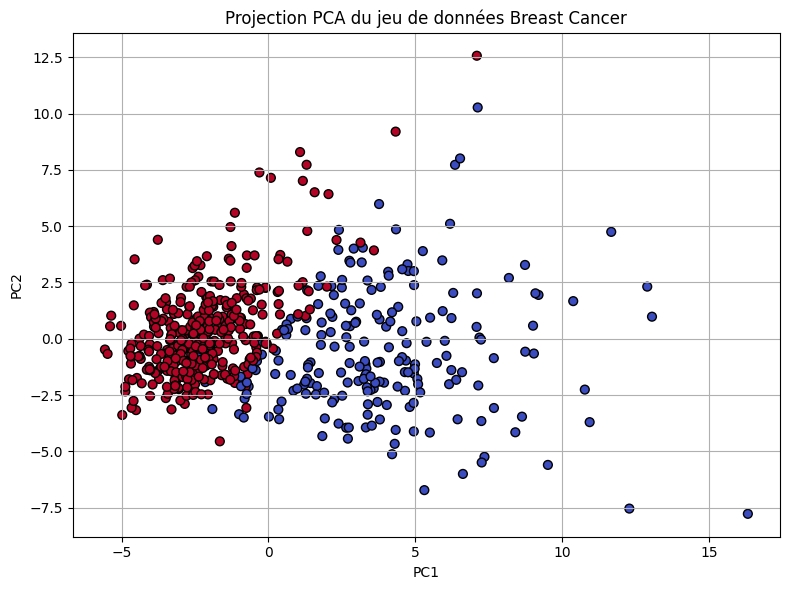

Matrice de confusion - KMeans:
[[176  36]
 [ 18 339]]

— Métriques KMeans —
Accuracy : 0.9050966608084359
Precision (macro) : 0.9056082474226804
Recall (macro)    : 0.8898842555890281
F1-score (macro)  : 0.8966122910441735
Matrice de confusion - PAM:
[[161  51]
 [  3 354]]

— Métriques PAM —
Accuracy : 0.9050966608084359
Precision (macro) : 0.9278906955736224
Recall (macro)    : 0.8755153004598066
F1-score (macro)  : 0.8927584184955604
Hybride terminé en 0.14s

— Métriques —
Accuracy : 0.9103690685413005
Precision (macro) : 0.9195406390613431
Recall (macro)    : 0.8892962845515564
F1-score (macro)  : 0.9008863158973308


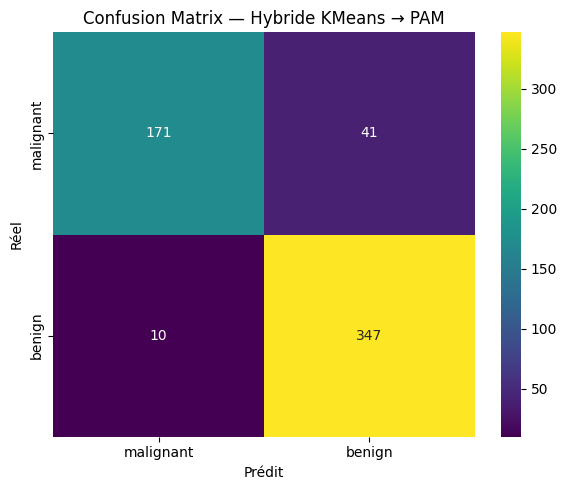

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import seaborn as sns

# Chargement des données
data = load_breast_cancer()
X = data.data
y = data.target

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualisation PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title("Projection PCA du jeu de données Breast Cancer")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
aligned_kmeans = np.zeros_like(kmeans_labels)
for i in range(2):
    aligned_kmeans[kmeans_labels == i] = mode(y[kmeans_labels == i], keepdims=True)[0]
cm_kmeans = confusion_matrix(y, aligned_kmeans)
print("Matrice de confusion - KMeans:")
print(cm_kmeans)


# — Métriques KMeans —
print("\n— Métriques KMeans —")
print("Accuracy :", accuracy_score(y, aligned_kmeans))
print("Precision (macro) :", precision_score(y, aligned_kmeans, average='macro'))
print("Recall (macro)    :", recall_score(y, aligned_kmeans, average='macro'))
print("F1-score (macro)  :", f1_score(y, aligned_kmeans, average='macro'))

# K-Medoids clustering
def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()
    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2), axis=1)
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    final_labels = np.argmin(D, axis=1)
    return final_labels, medoids

pam_labels, _ = kmedoids_pam(X_scaled, k=2)
aligned_pam = np.zeros_like(pam_labels)
for i in range(2):
    aligned_pam[pam_labels == i] = mode(y[pam_labels == i], keepdims=True)[0]
cm_pam = confusion_matrix(y, aligned_pam)
print("Matrice de confusion - PAM:")
print(cm_pam)


# — Métriques PAM —
print("\n— Métriques PAM —")
print("Accuracy :", accuracy_score(y, aligned_pam))
print("Precision (macro) :", precision_score(y, aligned_pam, average='macro'))
print("Recall (macro)    :", recall_score(y, aligned_pam, average='macro'))
print("F1-score (macro)  :", f1_score(y, aligned_pam, average='macro'))



import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ——— Fonction PAM (K‑Medoids)
def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()
    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2), axis=1)
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break
    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    final_labels = np.argmin(D_final, axis=1)
    return final_labels, medoids

# ——— Méthode hybride
def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    start_time = time.time()
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    
    local_centers = []
    for sub_idx in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10).fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)

    # PAM sur les centres
    _, medoids = kmedoids_pam(C, k=n_clusters)

    # Assignation finale
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)

    print(f"Hybride terminé en {time.time() - start_time:.2f}s")
    return labels, medoids

# ——— Données
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ——— Application de la méthode hybride
n_subsets = 5
n_clusters = 2
y_pred, medoids = hybrid_kmeans_kmedoids(X_scaled, n_subsets, n_clusters, random_state=42)

# ——— Réalignement clusters → classes
labels_aligned = np.zeros_like(y_pred)
for cl in range(n_clusters):
    mask = (y_pred == cl)
    if np.any(mask):
        labels_aligned[mask] = mode(y[mask], keepdims=True)[0]

# ——— Évaluation
print("\n— Métriques —")
print("Accuracy :", accuracy_score(y, labels_aligned))
print("Precision (macro) :", precision_score(y, labels_aligned, average='macro'))
print("Recall (macro)    :", recall_score(y, labels_aligned, average='macro'))
print("F1-score (macro)  :", f1_score(y, labels_aligned, average='macro'))

# ——— Matrice de confusion
cm = confusion_matrix(y, labels_aligned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Confusion Matrix — Hybride KMeans → PAM")
plt.tight_layout()
plt.show()



## BREARST CANCER DATASET - H2 

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# 1. Chargement et normalisation
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PAM fonction
def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()
    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2), axis=1)
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    final_labels = np.argmin(D, axis=1)
    return final_labels, medoids

# 3. H2
def k_mm_clustering(X, k):
    # Étape 1: KMeans
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_km = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Étape 2: trouver l’objet du cluster le plus proche de chaque centroïde
    new_medoids = []
    for i in range(k):
        cluster_pts = X[labels_km == i]
        if cluster_pts.shape[0] == 0:
            continue
        dists = np.linalg.norm(cluster_pts - centroids[i], axis=1)
        best_idx = np.argmin(dists)
        new_medoids.append(cluster_pts[best_idx])
    new_medoids = np.array(new_medoids)

    # Étape 3: PAM avec les nouveaux "medoids" comme initialisation
    labels_final, _ = kmedoids_pam(X, k=k, max_iter=100)
    return labels_final

# 4. Appliquer H2
kmm_labels = k_mm_clustering(X_scaled, k=2)

# Réalignement par vote majoritaire
aligned_kmm = np.zeros_like(kmm_labels)
for i in range(2):
    aligned_kmm[kmm_labels == i] = mode(y[kmm_labels == i], keepdims=True)[0]

# 5. Évaluation
print("\n— Métriques —")
print("Accuracy :", accuracy_score(y, aligned_kmm))
print("Precision (macro) :", precision_score(y, aligned_kmm, average='macro'))
print("Recall (macro)    :", recall_score(y, aligned_kmm, average='macro'))
print("F1-score (macro)  :", f1_score(y, aligned_kmm, average='macro'))

# Matrice de confusion
cm_kmm = confusion_matrix(y, aligned_kmm)
print("\nMatrice de confusion :")
print(cm_kmm)



— Métriques —
Accuracy : 0.8910369068541301
Precision (macro) : 0.8953627893845285
Recall (macro)    : 0.870058400718778
F1-score (macro)  : 0.8799381959759318

Matrice de confusion :
[[167  45]
 [ 17 340]]


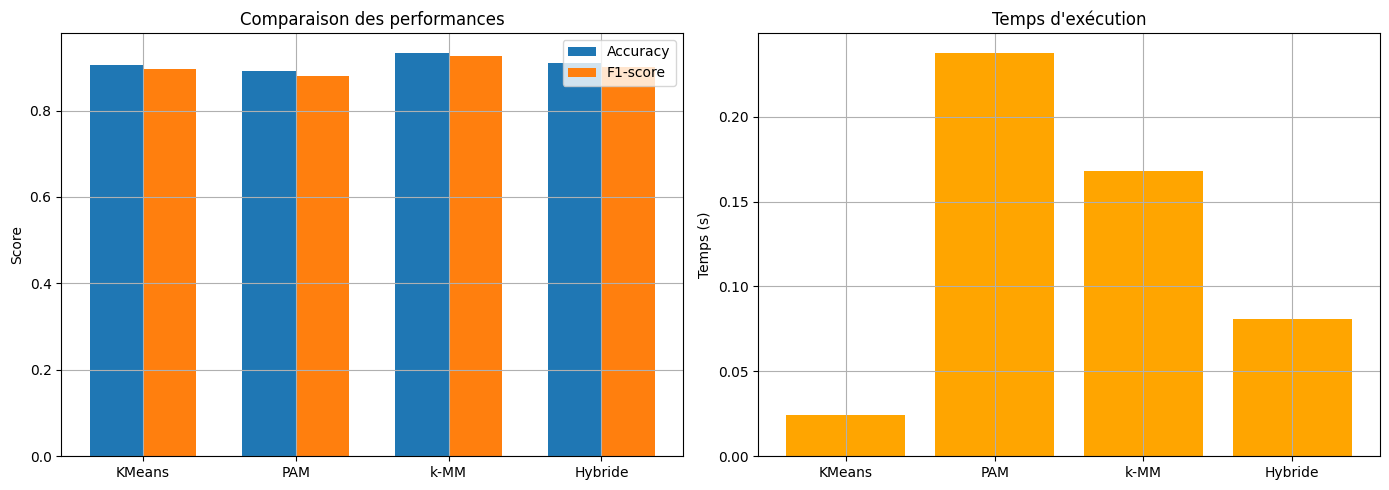

— k-MM —
Precision (macro) : 0.9357
Recall    (macro) : 0.9209

— Hybride —
Precision (macro) : 0.9195
Recall    (macro) : 0.8893


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
from scipy.stats import mode

# Chargement des données
data = load_breast_cancer()
X = data.data
y = data.target
X_scaled = StandardScaler().fit_transform(X)

# PAM
def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()
    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2), axis=1)
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break
    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    final_labels = np.argmin(D_final, axis=1)
    return final_labels, medoids

# H2
def k_mm_clustering(X, k):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_km = km.fit_predict(X)
    centroids = km.cluster_centers_
    new_medoids = []
    for i in range(k):
        cluster_pts = X[labels_km == i]
        if cluster_pts.shape[0] == 0:
            continue
        dists = np.linalg.norm(cluster_pts - centroids[i], axis=1)
        best_idx = np.argmin(dists)
        new_medoids.append(cluster_pts[best_idx])
    new_medoids = np.array(new_medoids)
    labels_final, _ = kmedoids_pam(X, k=k, max_iter=100)
    return labels_final

# Méthode hybride
def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    start_time = time.time()
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    local_centers = []
    for sub_idx in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10).fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)
    _, medoids = kmedoids_pam(C, k=n_clusters)
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    return labels, time.time() - start_time

# Évaluation
def evaluate(y_true, y_pred):
    aligned = np.zeros_like(y_pred)
    for i in range(2):
        aligned[y_pred == i] = mode(y_true[y_pred == i], keepdims=True)[0]
    acc = accuracy_score(y_true, aligned)
    prec = precision_score(y_true, aligned, average='macro')
    rec = recall_score(y_true, aligned, average='macro')
    f1 = f1_score(y_true, aligned, average='macro')
    return acc, prec, rec, f1

# Exécution et stockage des résultats
results = {}
times = {}

# KMeans
start = time.time()
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
times["KMeans"] = time.time() - start
results["KMeans"] = evaluate(y, kmeans_labels)

# PAM
start = time.time()
pam_labels, _ = kmedoids_pam(X_scaled, 2)
times["PAM"] = time.time() - start
results["PAM"] = evaluate(y, pam_labels)

# H2
start = time.time()
kmm_labels = k_mm_clustering(X_scaled, 2)
times["H2"] = time.time() - start
results["H2"] = evaluate(y, kmm_labels)

# Hybride
hyb_labels, t_hyb = hybrid_kmeans_kmedoids(X_scaled, n_subsets=5, n_clusters=2, random_state=42)
times["Hybride"] = t_hyb
results["Hybride"] = evaluate(y, hyb_labels)

# Affichage des résultats
methods = list(results.keys())
accuracies = [results[m][0] for m in methods]
f1_scores = [results[m][3] for m in methods]
exec_times = [times[m] for m in methods]

# Graphique des métriques
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
x = np.arange(len(methods))
width = 0.35
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1-score')
plt.xticks(x, methods)
plt.ylabel("Score")
plt.title("Comparaison des performances")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(methods, exec_times, color='orange')
plt.ylabel("Temps (s)")
plt.title("Temps d'exécution")
plt.grid(True)

plt.tight_layout()
plt.show()


# Précision et Rappel pour H2
precision_kmm = results["H2"][1]
recall_kmm = results["H2"][2]
print("— h2 —")
print(f"Precision (macro) : {precision_kmm:.4f}")
print(f"Recall    (macro) : {recall_kmm:.4f}")

# Précision et Rappel pour l'Hybride
precision_hyb = results["Hybride"][1]
recall_hyb = results["Hybride"][2]
print("\n— Hybride —")
print(f"Precision (macro) : {precision_hyb:.4f}")
print(f"Recall    (macro) : {recall_hyb:.4f}")



## GRAPHES 

c:\Users\rizd\Desktop\Odyssey\ZEENV\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


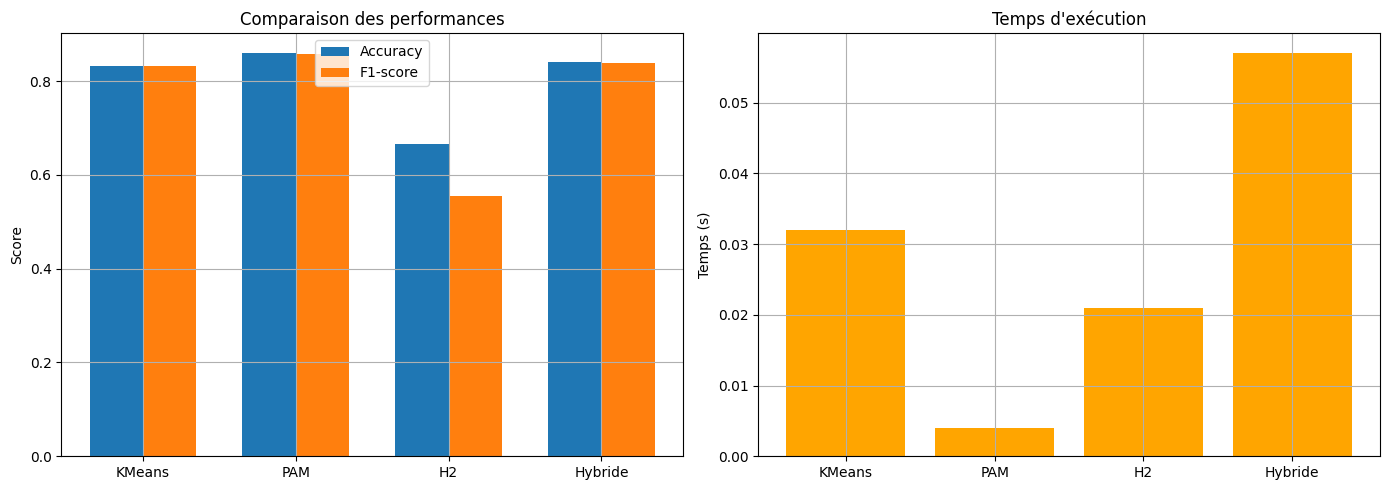

— H2 —
Precision (macro) : 0.5000
Recall    (macro) : 0.6667

— Hybride —
Precision (macro) : 0.8425
Recall    (macro) : 0.8400


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
from scipy.stats import mode

# Chargement des données Iris
iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)

# PAM

def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()
    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2), axis=1)
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break
    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    final_labels = np.argmin(D_final, axis=1)
    return final_labels, medoids

# H2

def k_mm_clustering(X, k):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_km = km.fit_predict(X)
    centroids = km.cluster_centers_
    new_medoids = []
    for i in range(k):
        cluster_pts = X[labels_km == i]
        if cluster_pts.shape[0] == 0:
            continue
        dists = np.linalg.norm(cluster_pts - centroids[i], axis=1)
        best_idx = np.argmin(dists)
        new_medoids.append(cluster_pts[best_idx])
    new_medoids = np.array(new_medoids)
    labels_final, _ = kmedoids_pam(X, k=k, max_iter=100)
    return labels_final

# Méthode hybride

def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    start_time = time.time()
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    local_centers = []
    for sub_idx in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10).fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)
    _, medoids = kmedoids_pam(C, k=n_clusters)
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    return labels, time.time() - start_time

# Évaluation

def evaluate(y_true, y_pred):
    aligned = np.zeros_like(y_pred)
    for i in range(3):
        aligned[y_pred == i] = mode(y_true[y_pred == i], keepdims=True)[0]
    acc = accuracy_score(y_true, aligned)
    prec = precision_score(y_true, aligned, average='macro')
    rec = recall_score(y_true, aligned, average='macro')
    f1 = f1_score(y_true, aligned, average='macro')
    return acc, prec, rec, f1

# Exécution et stockage des résultats
results = {}
times = {}

# KMeans
start = time.time()
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
times["KMeans"] = time.time() - start
results["KMeans"] = evaluate(y, kmeans_labels)

# PAM
start = time.time()
pam_labels, _ = kmedoids_pam(X_scaled, 3)
times["PAM"] = time.time() - start
results["PAM"] = evaluate(y, pam_labels)

# H2
start = time.time()
kmm_labels = k_mm_clustering(X_scaled, 3)
times["H2"] = time.time() - start
results["H2"] = evaluate(y, kmm_labels)

# Hybride
hyb_labels, t_hyb = hybrid_kmeans_kmedoids(X_scaled, n_subsets=3, n_clusters=3, random_state=42)
times["Hybride"] = t_hyb
results["Hybride"] = evaluate(y, hyb_labels)

# Affichage des résultats
methods = list(results.keys())
accuracies = [results[m][0] for m in methods]
f1_scores = [results[m][3] for m in methods]
exec_times = [times[m] for m in methods]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
x = np.arange(len(methods))
width = 0.35
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1-score')
plt.xticks(x, methods)
plt.ylabel("Score")
plt.title("Comparaison des performances")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(methods, exec_times, color='orange')
plt.ylabel("Temps (s)")
plt.title("Temps d'exécution")
plt.grid(True)

plt.tight_layout()
plt.show()

# Précision et Rappel pour H2
precision_kmm = results["H2"][1]
recall_kmm = results["H2"][2]
print("— H2 —")
print(f"Precision (macro) : {precision_kmm:.4f}")
print(f"Recall    (macro) : {recall_kmm:.4f}")

# Précision et Rappel pour l'Hybride
precision_hyb = results["Hybride"][1]
recall_hyb = results["Hybride"][2]
print("\n— Hybride —")
print(f"Precision (macro) : {precision_hyb:.4f}")
print(f"Recall    (macro) : {recall_hyb:.4f}")

In [67]:
import random
import math

def euclidean(a, b):
    return math.sqrt(sum((x - y)**2 for x, y in zip(a, b)))


## kmeans from scratch 

In [24]:

def assign_clusters(data, centers):
    clusters = [[] for _ in centers]
    for point in data:
        idx = min(range(len(centers)), key=lambda i: euclidean(point, centers[i]))
        clusters[idx].append(point)
    return clusters

def update_centers(clusters):
    new_centers = []
    for cluster in clusters:
        if cluster:
            dim = len(cluster[0])
            center = [sum(p[i] for p in cluster) / len(cluster) for i in range(dim)]
        else:
            center = [0] * len(clusters[0][0])
        new_centers.append(center)
    return new_centers

def kmeans(data, k, max_iter=100):
    centers = random.sample(data, k)
    for _ in range(max_iter):
        clusters = assign_clusters(data, centers)
        new_centers = update_centers(clusters)
        if new_centers == centers:
            break
        centers = new_centers
    return centers, clusters


## kmedoid from scratch

In [25]:
def total_cost(medoids, clusters):
    cost = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            cost += euclidean(point, medoids[i])
    return cost

def assign_clusters(data, medoids):
    clusters = [[] for _ in medoids]
    for point in data:
        idx = min(range(len(medoids)), key=lambda i: euclidean(point, medoids[i]))
        clusters[idx].append(point)
    return clusters

def kmedoids(data, k, max_iter=100):
    medoids = random.sample(data, k)
    for _ in range(max_iter):
        clusters = assign_clusters(data, medoids)
        current_cost = total_cost(medoids, clusters)
        improved = False

        for i in range(k):
            for point in clusters[i]:
                if point == medoids[i]:
                    continue
                # Swap candidate
                temp_medoids = medoids[:]
                temp_medoids[i] = point
                temp_clusters = assign_clusters(data, temp_medoids)
                temp_cost = total_cost(temp_medoids, temp_clusters)
                if temp_cost < current_cost:
                    medoids = temp_medoids
                    clusters = temp_clusters
                    current_cost = temp_cost
                    improved = True
        if not improved:
            break
    return medoids, clusters


In [ ]:
# ------------------- Méthode hybride -------------------
def hybrid_kmeans_kmedoids(data, n_subsets, n_clusters):
    random.shuffle(data)
    subsets = [data[i::n_subsets] for i in range(n_subsets)]

    # 1. KMeans sur chaque sous-ensemble
    all_centers = []
    for subset in subsets:
        centers, _ = kmeans(subset, n_clusters)
        all_centers.extend(centers)

    # 2. KMedoids sur l'ensemble des centres
    final_medoids, _ = kmedoids(all_centers, n_clusters)

    # 3. Réassignation de tous les points aux medoids finaux
    clusters = assign_clusters(data, final_medoids)
    labels = [0] * len(data)
    point_to_idx = {tuple(p): i for i, p in enumerate(data)}
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            labels[point_to_idx[tuple(point)]] = cluster_idx

    return labels, final_medoids


In [70]:
def kmm(data, k):
    # Étape 1 : KMeans
    kmeans_centers, clusters = kmeans(data, k)

    # Étape 2 : Remplacer les centroïdes par l'objet le plus proche (min distance intra-cluster)
    new_medoids = []
    for center, cluster in zip(kmeans_centers, clusters):
        if not cluster:
            new_medoids.append(center)
            continue
        closest = min(cluster, key=lambda p: euclidean(p, center))
        new_medoids.append(closest)

    # Étape 3 : KMedoids sur les nouveaux objets centraux
    final_medoids, final_clusters = kmedoids(data, k)

    return final_clusters, final_medoids

## adaptation

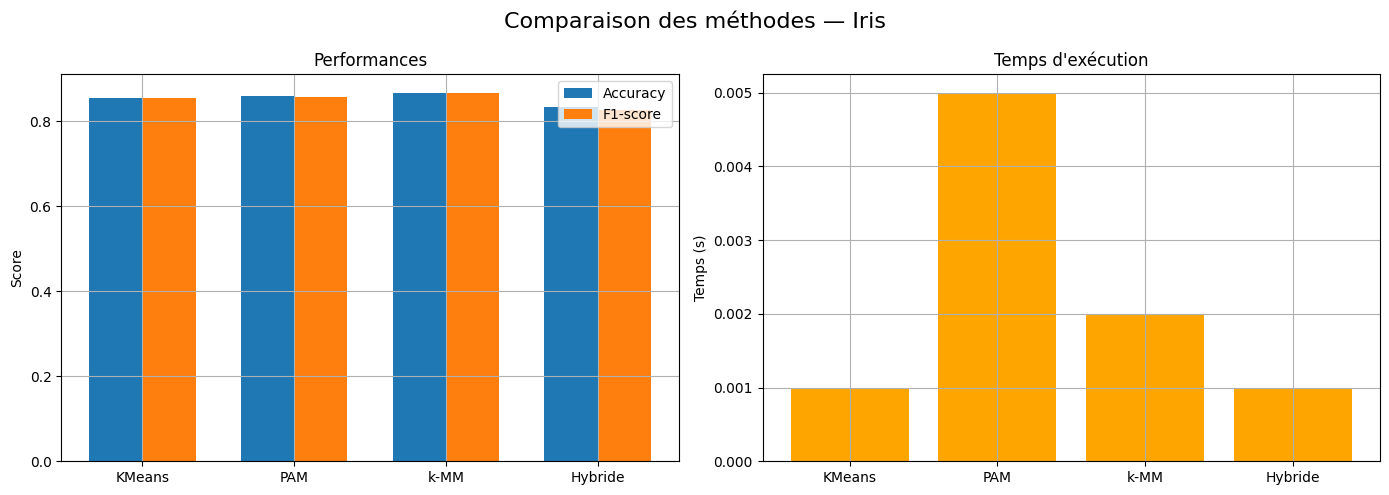

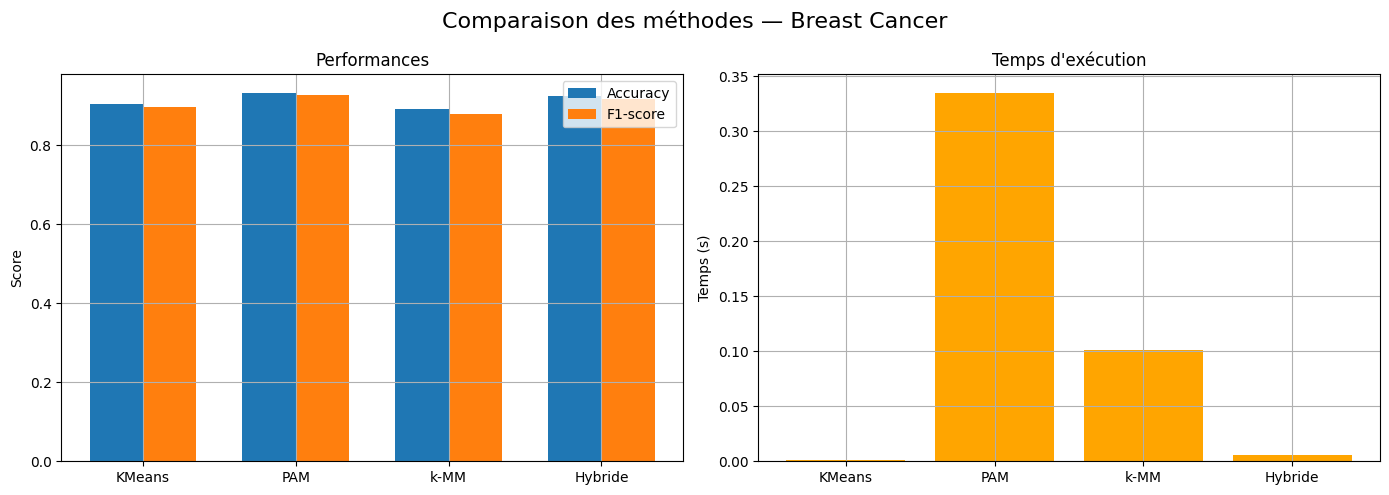

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import mode

# ------------------------------
# Implémentation KMeans 
def kmeans_custom(X, k, max_iter=100, tol=1e-4):
    n_samples, n_features = X.shape
    rng = np.random.default_rng(seed=42)
    centroids = X[rng.choice(n_samples, size=k, replace=False)]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return labels, centroids

# ------------------------------
# KMedoids (PAM)
def kmedoids_pam(X, k, max_iter=100):
    n = X.shape[0]
    medoid_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoid_idx].copy()
    for _ in range(max_iter):
        D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
        labels = np.argmin(D, axis=1)
        updated = False
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                continue
            intra_dist = np.sum(np.linalg.norm(cluster_pts[:, None] - cluster_pts[None, :], axis=2), axis=1)
            best = np.argmin(intra_dist)
            if not np.allclose(medoids[i], cluster_pts[best]):
                medoids[i] = cluster_pts[best]
                updated = True
        if not updated:
            break
    D_final = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(D_final, axis=1), medoids

# ------------------------------
# H2
def k_mm_clustering(X, k):
    labels_km, centroids = kmeans_custom(X, k)
    new_medoids = []
    for i in range(k):
        cluster_pts = X[labels_km == i]
        if cluster_pts.shape[0] == 0:
            continue
        dists = np.linalg.norm(cluster_pts - centroids[i], axis=1)
        best_idx = np.argmin(dists)
        new_medoids.append(cluster_pts[best_idx])
    new_medoids = np.array(new_medoids)
    labels_final, _ = kmedoids_pam(X, k=k, max_iter=100)
    return labels_final

# ------------------------------
# Hybride KMeans → KMedoids H1
def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    start_time = time.time()
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    local_centers = []
    for sub_idx in splits:
        _, centers = kmeans_custom(X[sub_idx], n_clusters)
        local_centers.append(centers)
    C = np.vstack(local_centers)
    _, medoids = kmedoids_pam(C, k=n_clusters)
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    return labels, time.time() - start_time

# ------------------------------
# Évaluation
def evaluate(y_true, y_pred):
    aligned = np.zeros_like(y_pred)
    for i in range(len(np.unique(y_true))):
        aligned[y_pred == i] = mode(y_true[y_pred == i], keepdims=True)[0]
    acc = accuracy_score(y_true, aligned)
    prec = precision_score(y_true, aligned, average='macro')
    rec = recall_score(y_true, aligned, average='macro')
    f1 = f1_score(y_true, aligned, average='macro')
    return acc, prec, rec, f1

# ------------------------------
# Application sur un dataset
def run_on_dataset(name, X, y, n_clusters):
    X_scaled = StandardScaler().fit_transform(X)
    results = {}
    times = {}

    # KMeans
    start = time.time()
    labels_km, _ = kmeans_custom(X_scaled, n_clusters)
    times["KMeans"] = time.time() - start
    results["KMeans"] = evaluate(y, labels_km)

    # PAM
    start = time.time()
    labels_pam, _ = kmedoids_pam(X_scaled, n_clusters)
    times["PAM"] = time.time() - start
    results["PAM"] = evaluate(y, labels_pam)

    # H2
    start = time.time()
    labels_kmm = k_mm_clustering(X_scaled, n_clusters)
    times["H2"] = time.time() - start
    results["H2"] = evaluate(y, labels_kmm)

    # Hybride
    labels_hyb, t_hyb = hybrid_kmeans_kmedoids(X_scaled, n_subsets=3, n_clusters=n_clusters)
    times["Hybride"] = t_hyb
    results["Hybride"] = evaluate(y, labels_hyb)

    # Visualisation
    methods = list(results.keys())
    acc = [results[m][0] for m in methods]
    f1s = [results[m][3] for m in methods]
    exec_times = [times[m] for m in methods]

    plt.figure(figsize=(14, 5))
    plt.suptitle(f"Comparaison des méthodes — {name}", fontsize=16)

    plt.subplot(1, 2, 1)
    x = np.arange(len(methods))
    width = 0.35
    plt.bar(x - width/2, acc, width, label='Accuracy')
    plt.bar(x + width/2, f1s, width, label='F1-score')
    plt.xticks(x, methods)
    plt.ylabel("Score")
    plt.title("Performances")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(methods, exec_times, color='orange')
    plt.ylabel("Temps (s)")
    plt.title("Temps d'exécution")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return results

# ------------------------------
# Lancer sur IRIS et BREAST CANCER
iris = load_iris()
res_iris = run_on_dataset("Iris", iris.data, iris.target, n_clusters=3)

bc = load_breast_cancer()
res_bc = run_on_dataset("Breast Cancer", bc.data, bc.target, n_clusters=2)


## test diff entre kmeans et k mdeoid

In [27]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import linear_sum_assignment
import time


# Function to match clustering labels to true labels
def match_labels(true_labels, cluster_labels):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
    new_labels = np.vectorize(lambda x: label_mapping[x])(cluster_labels)
    return new_labels


# KMedoids using pyclustering
def kmedoids_pyclustering(X, n_clusters):
    distance_matrix = calculate_distance_matrix(X)
    initial_medoids = list(np.random.choice(len(X), n_clusters, replace=False))
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    labels = np.zeros(len(X))
    clusters = kmedoids_instance.get_clusters()
    for cluster_id, points in enumerate(clusters):
        for idx in points:
            labels[idx] = cluster_id

    return labels.astype(int)


# Comparison function
def compare_kmeans_kmedoids(data, true_labels, dataset_name, n_clusters=3):
    print(f"\n--- Dataset: {dataset_name} ---")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)

    # KMeans
    start = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_time = time.time() - start
    kmeans_labels_matched = match_labels(true_labels, kmeans_labels)

    print(f"KMeans    - Time: {kmeans_time:.4f}s")
    print(f"  Accuracy : {accuracy_score(true_labels, kmeans_labels_matched):.4f}")
    print(f"  Precision: {precision_score(true_labels, kmeans_labels_matched, average='macro'):.4f}")
    print(f"  Recall   : {recall_score(true_labels, kmeans_labels_matched, average='macro'):.4f}")
    print(f"  F1 Score : {f1_score(true_labels, kmeans_labels_matched, average='macro'):.4f}")

    # KMedoids
    start = time.time()
    kmedoids_labels = kmedoids_pyclustering(X_scaled, n_clusters)
    kmedoids_time = time.time() - start
    kmedoids_labels_matched = match_labels(true_labels, kmedoids_labels)

    print(f"KMedoids  - Time: {kmedoids_time:.4f}s")
    print(f"  Accuracy : {accuracy_score(true_labels, kmedoids_labels_matched):.4f}")
    print(f"  Precision: {precision_score(true_labels, kmedoids_labels_matched, average='macro'):.4f}")
    print(f"  Recall   : {recall_score(true_labels, kmedoids_labels_matched, average='macro'):.4f}")
    print(f"  F1 Score : {f1_score(true_labels, kmedoids_labels_matched, average='macro'):.4f}")


# Load datasets
iris = load_iris()
breast_cancer = load_breast_cancer()

# Compare
compare_kmeans_kmedoids(iris.data, iris.target, "Iris", n_clusters=3)
compare_kmeans_kmedoids(breast_cancer.data, breast_cancer.target, "Breast Cancer", n_clusters=2)



--- Dataset: Iris ---
KMeans    - Time: 0.0150s
  Accuracy : 0.5800
  Precision: 0.5704
  Recall   : 0.5800
  F1 Score : 0.5309
KMedoids  - Time: 0.0860s
  Accuracy : 0.8467
  Precision: 0.8473
  Recall   : 0.8467
  F1 Score : 0.8465

--- Dataset: Breast Cancer ---
KMeans    - Time: 0.0060s
  Accuracy : 0.9121
  Precision: 0.9169
  Recall   : 0.8945
  F1 Score : 0.9036
KMedoids  - Time: 5.7010s
  Accuracy : 0.8963
  Precision: 0.8974
  Recall   : 0.8790
  F1 Score : 0.8867


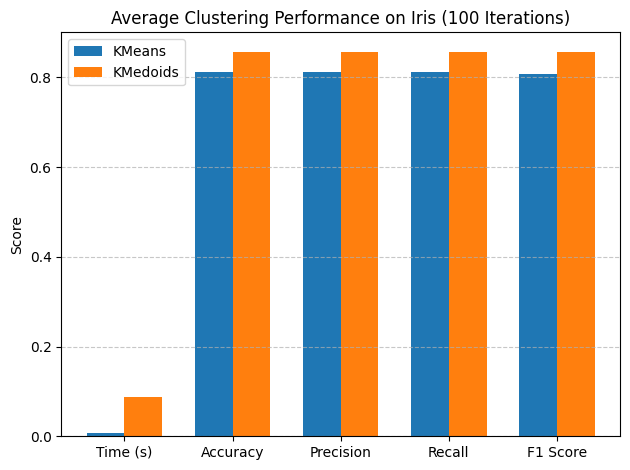

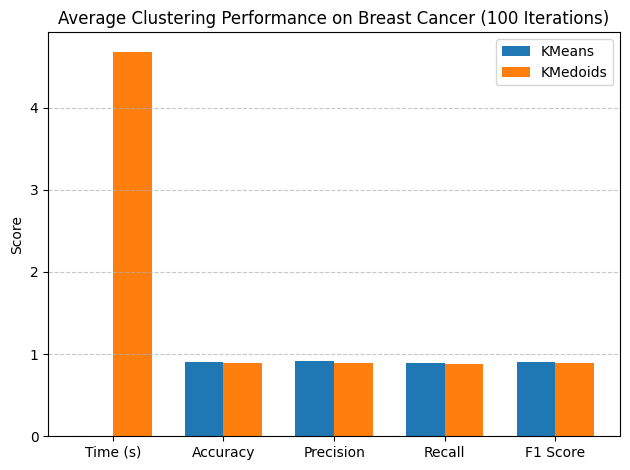

In [2]:
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import time


# Match clustering labels to true labels
def match_labels(true_labels, cluster_labels):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
    new_labels = np.vectorize(lambda x: label_mapping[x])(cluster_labels)
    return new_labels


# KMedoids using pyclustering
def kmedoids_pyclustering(X, n_clusters):
    distance_matrix = calculate_distance_matrix(X)
    initial_medoids = list(np.random.choice(len(X), n_clusters, replace=False))
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    labels = np.zeros(len(X))
    clusters = kmedoids_instance.get_clusters()
    for cluster_id, points in enumerate(clusters):
        for idx in points:
            labels[idx] = cluster_id

    return labels.astype(int)


# Function to evaluate and collect metrics
def evaluate_clustering(X, y, n_clusters, n_iter=100):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    metrics_kmeans = {'time': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    metrics_kmedoids = {'time': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for _ in range(n_iter):
        # --- KMeans ---
        start = time.time()
        kmeans = KMeans(n_clusters=n_clusters, random_state=None, n_init='auto')
        kmeans_labels = kmeans.fit_predict(X_scaled)
        elapsed = time.time() - start
        kmeans_labels = match_labels(y, kmeans_labels)

        metrics_kmeans['time'].append(elapsed)
        metrics_kmeans['accuracy'].append(accuracy_score(y, kmeans_labels))
        metrics_kmeans['precision'].append(precision_score(y, kmeans_labels, average='macro'))
        metrics_kmeans['recall'].append(recall_score(y, kmeans_labels, average='macro'))
        metrics_kmeans['f1'].append(f1_score(y, kmeans_labels, average='macro'))

        # --- KMedoids ---
        start = time.time()
        kmedoids_labels = kmedoids_pyclustering(X_scaled, n_clusters)
        elapsed = time.time() - start
        kmedoids_labels = match_labels(y, kmedoids_labels)

        metrics_kmedoids['time'].append(elapsed)
        metrics_kmedoids['accuracy'].append(accuracy_score(y, kmedoids_labels))
        metrics_kmedoids['precision'].append(precision_score(y, kmedoids_labels, average='macro'))
        metrics_kmedoids['recall'].append(recall_score(y, kmedoids_labels, average='macro'))
        metrics_kmedoids['f1'].append(f1_score(y, kmedoids_labels, average='macro'))

    # Return average metrics
    return {
        'KMeans': {k: np.mean(v) for k, v in metrics_kmeans.items()},
        'KMedoids': {k: np.mean(v) for k, v in metrics_kmedoids.items()}
    }


# Function to plot results
def plot_metrics(results, title):
    labels = ['Time (s)', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    kmeans_values = [results['KMeans'][m] for m in ['time', 'accuracy', 'precision', 'recall', 'f1']]
    kmedoids_values = [results['KMedoids'][m] for m in ['time', 'accuracy', 'precision', 'recall', 'f1']]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, kmeans_values, width, label='KMeans')
    bars2 = ax.bar(x + width/2, kmedoids_values, width, label='KMedoids')

    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


# Load datasets
iris = load_iris()
breast_cancer = load_breast_cancer()

# Run evaluation
results_iris = evaluate_clustering(iris.data, iris.target, n_clusters=3, n_iter=100)
results_bc = evaluate_clustering(breast_cancer.data, breast_cancer.target, n_clusters=2, n_iter=100)

# Plot results
plot_metrics(results_iris, "Average Clustering Performance on Iris (100 Iterations)")
plot_metrics(results_bc, "Average Clustering Performance on Breast Cancer (100 Iterations)")


In [8]:
from pyclustering.cluster.kmedoids import kmedoids
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist
import time


# Match clustering labels to true labels
def match_labels(true_labels, cluster_labels):
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
    new_labels = np.vectorize(lambda x: label_mapping[x])(cluster_labels)
    return new_labels


# KMedoids clustering with customizable distance
def kmedoids_pyclustering(X, n_clusters, metric='cityblock'):
    distance_matrix = cdist(X, X, metric=metric)
    initial_medoids = list(np.random.choice(len(X), n_clusters, replace=False))
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    labels = np.zeros(len(X))
    clusters = kmedoids_instance.get_clusters()
    for cluster_id, points in enumerate(clusters):
        for idx in points:
            labels[idx] = cluster_id

    return labels.astype(int)


# Comparison function
def compare_kmeans_kmedoids(data, true_labels, dataset_name, n_clusters=3, kmedoid_metric='cityblock'):
    print(f"\n--- Dataset: {dataset_name} ---")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)

    # ----- KMeans -----
    start = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_time = time.time() - start
    kmeans_labels_matched = match_labels(true_labels, kmeans_labels)

    print(f"KMeans    - Time: {kmeans_time:.4f}s")
    print(f"  Accuracy : {accuracy_score(true_labels, kmeans_labels_matched):.4f}")
    print(f"  Precision: {precision_score(true_labels, kmeans_labels_matched, average='macro'):.4f}")
    print(f"  Recall   : {recall_score(true_labels, kmeans_labels_matched, average='macro'):.4f}")
    print(f"  F1 Score : {f1_score(true_labels, kmeans_labels_matched, average='macro'):.4f}")

    # ----- KMedoids -----
    start = time.time()
    kmedoids_labels = kmedoids_pyclustering(X_scaled, n_clusters, metric=kmedoid_metric)
    kmedoids_time = time.time() - start
    kmedoids_labels_matched = match_labels(true_labels, kmedoids_labels)

    print(f"KMedoids  - Time: {kmedoids_time:.4f}s (Metric: {kmedoid_metric})")
    print(f"  Accuracy : {accuracy_score(true_labels, kmedoids_labels_matched):.4f}")
    print(f"  Precision: {precision_score(true_labels, kmedoids_labels_matched, average='macro'):.4f}")
    print(f"  Recall   : {recall_score(true_labels, kmedoids_labels_matched, average='macro'):.4f}")
    print(f"  F1 Score : {f1_score(true_labels, kmedoids_labels_matched, average='macro'):.4f}")


# Load datasets
iris = load_iris()
breast_cancer = load_breast_cancer()

# Compare using Manhattan distance (cityblock)
compare_kmeans_kmedoids(iris.data, iris.target, "Iris", n_clusters=3, kmedoid_metric='cityblock')
compare_kmeans_kmedoids(breast_cancer.data, breast_cancer.target, "Breast Cancer", n_clusters=2, kmedoid_metric='cityblock')



--- Dataset: Iris ---
KMeans    - Time: 0.0060s
  Accuracy : 0.5800
  Precision: 0.5704
  Recall   : 0.5800
  F1 Score : 0.5309
KMedoids  - Time: 0.0150s (Metric: cityblock)
  Accuracy : 0.8800
  Precision: 0.8856
  Recall   : 0.8800
  F1 Score : 0.8792

--- Dataset: Breast Cancer ---
KMeans    - Time: 0.0040s
  Accuracy : 0.9121
  Precision: 0.9169
  Recall   : 0.8945
  F1 Score : 0.9036
KMedoids  - Time: 0.1360s (Metric: cityblock)
  Accuracy : 0.9438
  Precision: 0.9442
  Recall   : 0.9351
  F1 Score : 0.9393


## EFFET DU TYPE DE LA DISTANCE UTILISE SUR LA PERF DE KMEDOID PAR RAPPORT A KMEANS ,PERMET DE SAVOIR QUOI CHOISIR

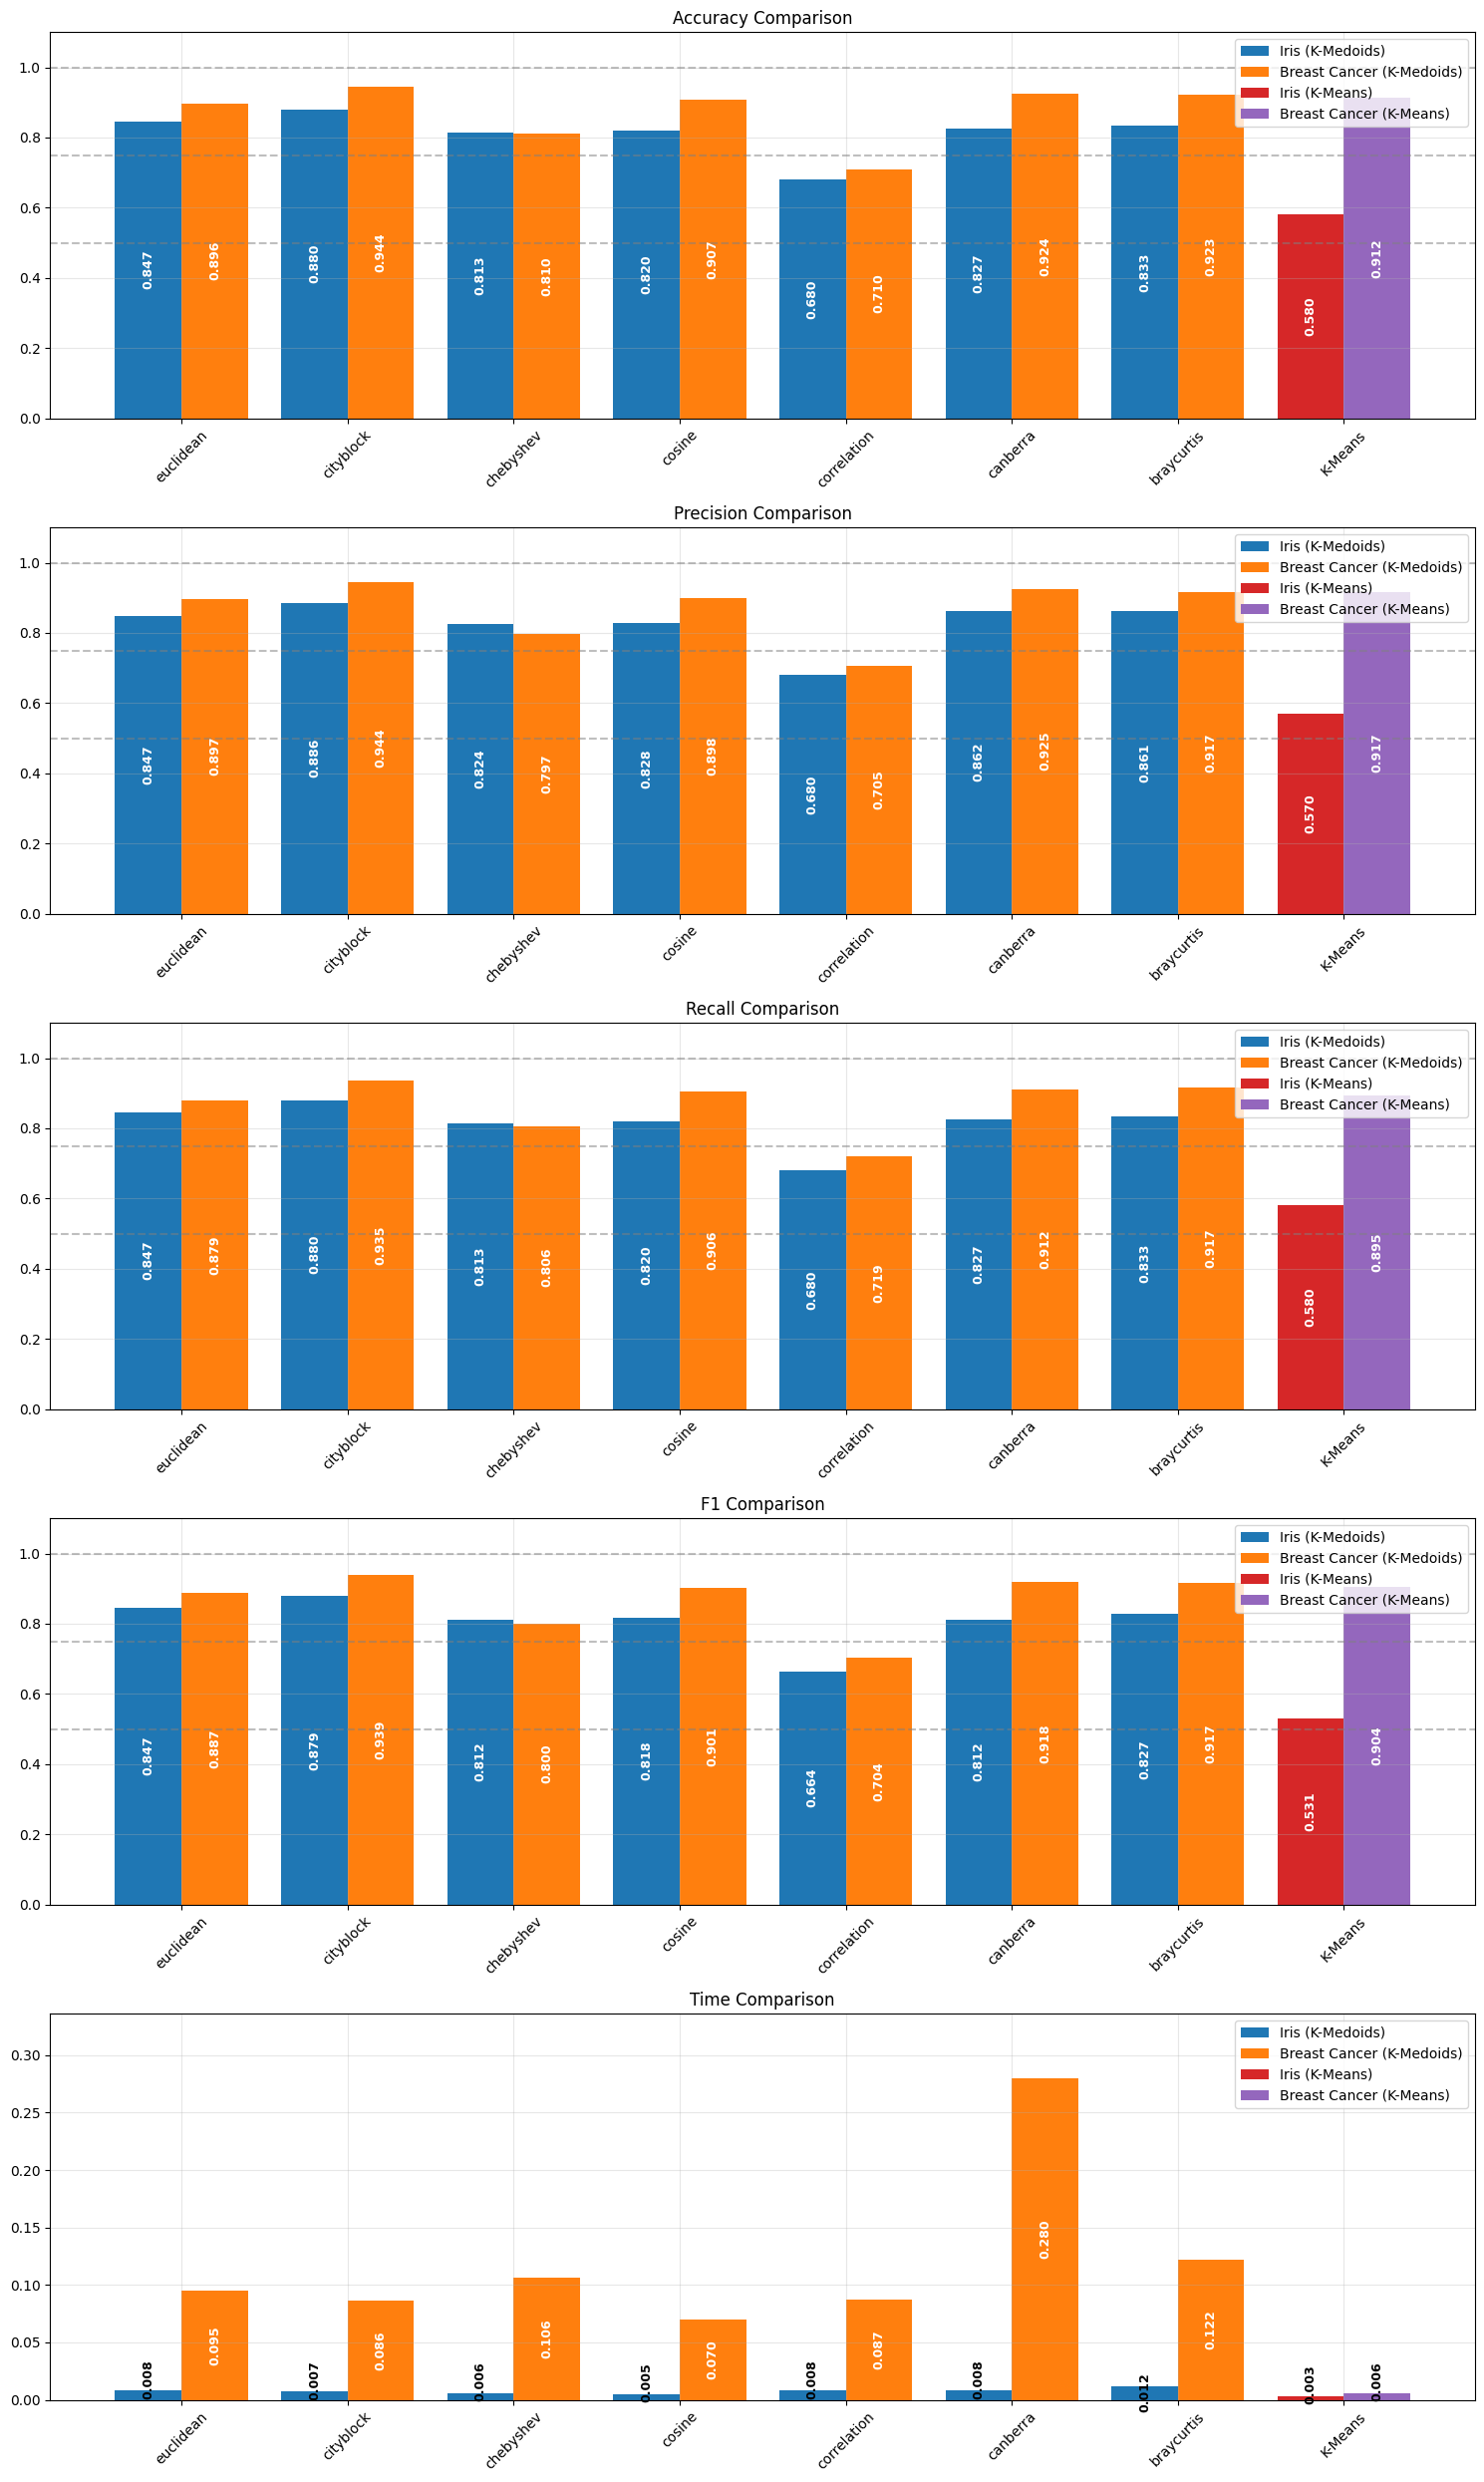

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pyclustering.cluster.kmedoids import kmedoids
import time

# List of distance metrics to test
distance_metrics = ['euclidean', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'canberra', 'braycurtis']

# Function to match predicted cluster labels with true labels
def match_labels(true_labels, cluster_labels):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
    new_labels = np.vectorize(lambda x: label_mapping[x])(cluster_labels)
    return new_labels

# Function to run K-Medoids clustering using pyclustering with a custom distance
def kmedoids_pyclustering(X, n_clusters, metric):
    distance_matrix = cdist(X, X, metric=metric)
    initial_medoids = list(np.random.choice(len(X), n_clusters, replace=False))
    kmedoids_instance = kmedoids(distance_matrix.tolist(), initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    labels = np.zeros(len(X))
    clusters = kmedoids_instance.get_clusters()
    for cluster_id, points in enumerate(clusters):
        for idx in points:
            labels[idx] = cluster_id
    return labels.astype(int)

# Function to evaluate clustering algorithms (K-Medoids and K-Means)
def evaluate_clustering_on_dataset(data, true_labels, dataset_name, n_clusters):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    
    # Prepare dictionary for storing evaluation results
    results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'time': []}

    # K-Medoids evaluation
    for metric in distance_metrics:
        start = time.time()
        labels = kmedoids_pyclustering(X_scaled, n_clusters, metric=metric)
        elapsed = time.time() - start
        matched_labels = match_labels(true_labels, labels)
        results['accuracy'].append(accuracy_score(true_labels, matched_labels))
        results['precision'].append(precision_score(true_labels, matched_labels, average='macro', zero_division=0))
        results['recall'].append(recall_score(true_labels, matched_labels, average='macro', zero_division=0))
        results['f1'].append(f1_score(true_labels, matched_labels, average='macro', zero_division=0))
        results['time'].append(elapsed)

    # K-Means evaluation
    start = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    elapsed = time.time() - start
    matched_labels = match_labels(true_labels, kmeans_labels)
    results['accuracy'].append(accuracy_score(true_labels, matched_labels))
    results['precision'].append(precision_score(true_labels, matched_labels, average='macro', zero_division=0))
    results['recall'].append(recall_score(true_labels, matched_labels, average='macro', zero_division=0))
    results['f1'].append(f1_score(true_labels, matched_labels, average='macro', zero_division=0))
    results['time'].append(elapsed)

    return results

# Load datasets
iris = load_iris()
breast_cancer = load_breast_cancer()

# Evaluate performance for each dataset
iris_results = evaluate_clustering_on_dataset(iris.data, iris.target, "Iris", n_clusters=3)
bc_results = evaluate_clustering_on_dataset(breast_cancer.data, breast_cancer.target, "Breast Cancer", n_clusters=2)

# Plotting results
metrics = ['accuracy', 'precision', 'recall', 'f1', 'time']
fig, axs = plt.subplots(len(metrics), 1, figsize=(15, 25))

# Helper function to add value labels on bars
def add_value_labels(ax, x_positions, heights, values, fmt='{:.3f}', color='white'):
    for x, height, val in zip(x_positions, heights, values):
        # If the value is really small, we might want to place the text above the bar
        if height < 0.01:
            y_pos = height + 0.01
            color = 'black'
        else:
            y_pos = height / 2
        
        ax.text(
            x,
            y_pos,
            fmt.format(val),
            ha='center',
            va='center',
            color=color,
            fontweight='bold',
            fontsize=9,
            rotation=90
        )

for i, metric in enumerate(metrics):
    # Positions for the bars
    x_pos_iris = np.arange(len(distance_metrics)) - 0.2
    x_pos_bc = np.arange(len(distance_metrics)) + 0.2
    x_pos_iris_kmeans = len(distance_metrics) - 0.2
    x_pos_bc_kmeans = len(distance_metrics) + 0.2
    
    # Heights of the bars (the actual values)
    iris_heights = iris_results[metric][:-1]
    bc_heights = bc_results[metric][:-1]
    iris_kmeans_height = iris_results[metric][-1]
    bc_kmeans_height = bc_results[metric][-1]
    
    # Create the bars
    axs[i].bar(x_pos_iris, iris_heights, width=0.4, label='Iris (K-Medoids)', color='#1f77b4')
    axs[i].bar(x_pos_bc, bc_heights, width=0.4, label='Breast Cancer (K-Medoids)', color='#ff7f0e')
    axs[i].bar(x_pos_iris_kmeans, iris_kmeans_height, width=0.4, label='Iris (K-Means)', color='#d62728')
    axs[i].bar(x_pos_bc_kmeans, bc_kmeans_height, width=0.4, label='Breast Cancer (K-Means)', color='#9467bd')
    
    # Add value labels
    add_value_labels(axs[i], x_pos_iris, iris_heights, iris_results[metric][:-1])
    add_value_labels(axs[i], x_pos_bc, bc_heights, bc_results[metric][:-1])
    add_value_labels(axs[i], [x_pos_iris_kmeans], [iris_kmeans_height], [iris_results[metric][-1]])
    add_value_labels(axs[i], [x_pos_bc_kmeans], [bc_kmeans_height], [bc_results[metric][-1]])
    
    # Adjust y-axis to make space for text if metric is 'time' (values might be very different)
    if metric == 'time':
        max_time = max(max(iris_results[metric]), max(bc_results[metric]))
        axs[i].set_ylim(0, max_time * 1.2)
    else:
        # For performance metrics, set a consistent scale
        axs[i].set_ylim(0, 1.1)
    
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].set_xticks(np.arange(len(distance_metrics) + 1))
    axs[i].set_xticklabels(distance_metrics + ['K-Means'], rotation=45)
    axs[i].legend(loc='upper right')
    axs[i].grid(True, alpha=0.3)
    
    # Add horizontal lines for better readability
    if metric != 'time':  # For metrics other than time, a reasonable benchmark is around 0.5-1.0
        axs[i].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
        axs[i].axhline(y=0.75, color='gray', linestyle='--', alpha=0.5)
        axs[i].axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## KMM implementation (2) avec les bibs 

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pyclustering.cluster.kmedoids import kmedoids

def kmm(X, k, metric='euclidean'):
    # Step 1: K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    initial_centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Step 2: Replace centroids with the object in the cluster that has minimal distance to it
    distance_matrix = cdist(X, initial_centroids, metric=metric)
    new_medoids = []
    for i in range(k):
        cluster_points = np.where(labels == i)[0]
        if len(cluster_points) == 0:
            continue
        distances = cdist(X[cluster_points], [initial_centroids[i]], metric=metric).flatten()
        closest_point_index = cluster_points[np.argmin(distances)]
        new_medoids.append(closest_point_index)

    # Step 3: Run K-Medoids with the new medoids
    dist_matrix_full = cdist(X, X, metric=metric)
    kmedoids_instance = kmedoids(dist_matrix_full.tolist(), new_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    clusters = kmedoids_instance.get_clusters()
    labels = np.zeros(len(X), dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cluster_id
    return labels


## New hybridation methode  (1)


--- Dataset: Iris ---


c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KMeans - Time: 0.1610s
  Accuracy : 0.6667
  Precision: 0.4823
  Recall   : 0.6667
  F1 Score : 0.5488
KMedoids - Time: 0.1170s
  Accuracy : 0.8667
  Precision: 0.8696
  Recall   : 0.8667
  F1 Score : 0.8662
Hybrid KMeans→KMedoids (n_sub=3) - Time: 0.0080s
  Accuracy : 0.8467
  Precision: 0.8503
  Recall   : 0.8467
  F1 Score : 0.8459


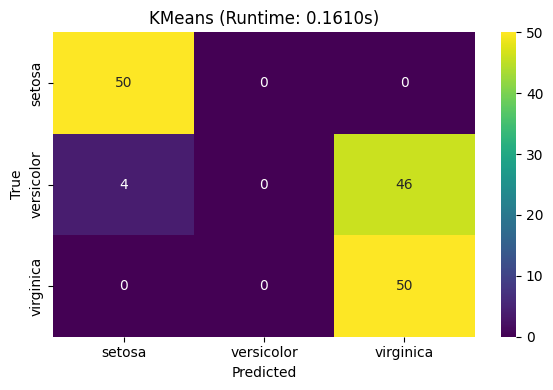

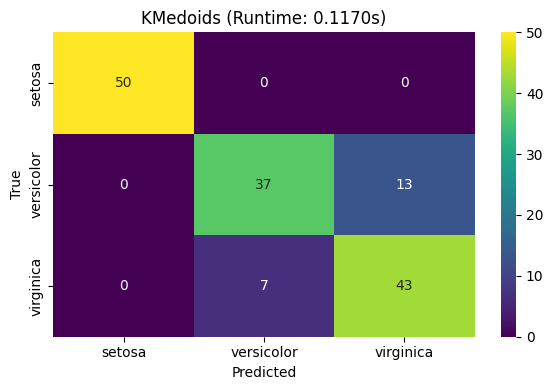

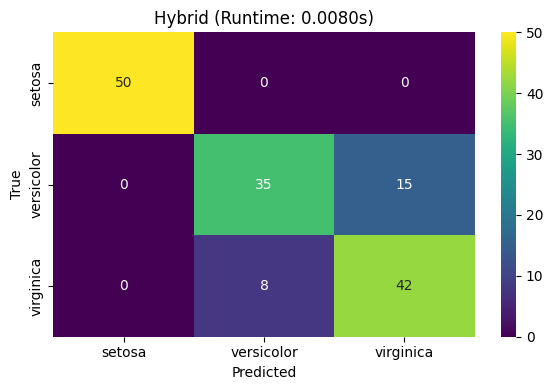


--- Dataset: Breast Cancer ---
KMeans - Time: 0.0090s
  Accuracy : 0.9121
  Precision: 0.9169
  Recall   : 0.8945
  F1 Score : 0.9036
KMedoids - Time: 5.3970s
  Accuracy : 0.8963
  Precision: 0.8974
  Recall   : 0.8790
  F1 Score : 0.8867
Hybrid KMeans→KMedoids (n_sub=3) - Time: 0.0150s
  Accuracy : 0.9121
  Precision: 0.9134
  Recall   : 0.8974
  F1 Score : 0.9043


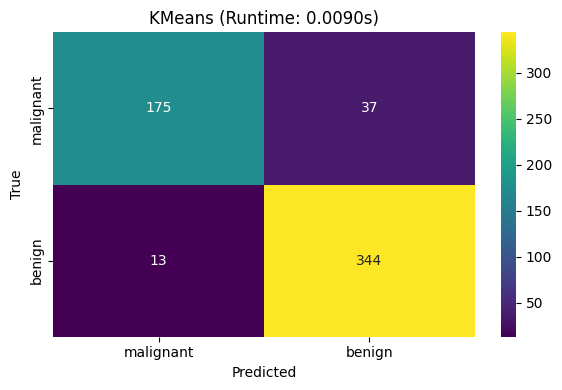

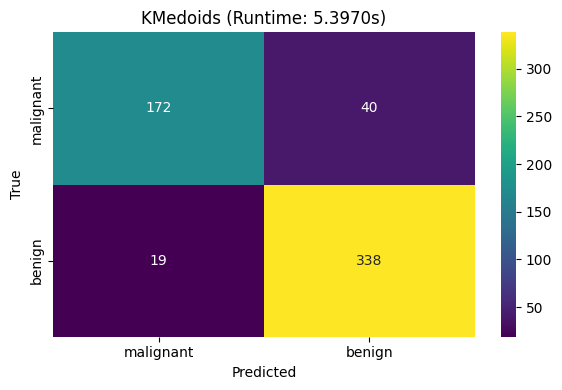

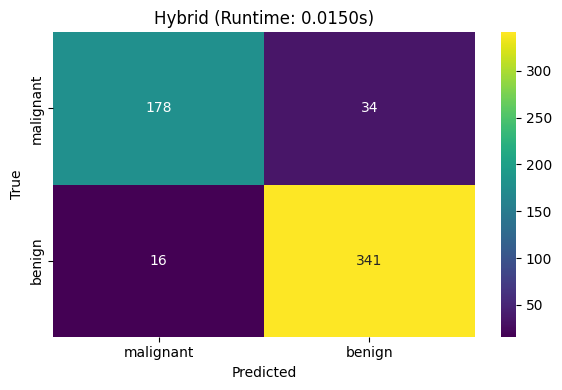

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from scipy.stats import mode
from scipy.optimize import linear_sum_assignment
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Function to match clustering labels to true labels
def match_labels(true_labels, cluster_labels):
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
    new_labels = np.vectorize(lambda x: label_mapping[x])(cluster_labels)
    return new_labels

# KMedoids using pyclustering
def kmedoids_pyclustering(X, n_clusters, initial_medoids=None):
    distance_matrix = calculate_distance_matrix(X)
    
    if initial_medoids is None:
        initial_medoids = list(np.random.choice(len(X), n_clusters, replace=False))
    
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    # Get labels
    labels = np.zeros(len(X))
    clusters = kmedoids_instance.get_clusters()
    for cluster_id, points in enumerate(clusters):
        for idx in points:
            labels[idx] = cluster_id
            
    # Get medoids
    medoid_indices = kmedoids_instance.get_medoids()
    medoids = X[medoid_indices]
    
    return labels.astype(int), medoids

def hybrid_kmeans_kmedoids(X, n_subsets, n_clusters, random_state=0):
    """
    1) Split X into n_subsets random subsets of approximately equal size
    2) Run KMeans(n_clusters) on each subset and store the centers
    3) Combine all centers and run KMedoids to extract n_clusters medoids
    4) Assign each point in X to the closest global medoid to get final labels
    """
    np.random.seed(random_state)
    # shuffle + split
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)

    # 1) KMeans on each split
    local_centers = []
    for sub_idx in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto').fit(X[sub_idx])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)  # shape = (n_subsets * n_clusters, n_features)

    # 2) KMedoids on the centers using pyclustering
    _, medoids = kmedoids_pyclustering(C, n_clusters)

    # 3) Final assignment
    D = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    labels = np.argmin(D, axis=1)
    return labels, medoids

# Function to evaluate a clustering method
def evaluate_clustering(X, true_labels, cluster_method, method_name, n_clusters, **kwargs):
    start = time.time()
    labels, medoids = cluster_method(X, **kwargs, n_clusters=n_clusters)
    
    # Align cluster labels with true classes using majority voting
    aligned_labels = np.zeros_like(labels)
    for cl in range(n_clusters):
        mask = (labels == cl)
        if np.sum(mask) > 0:  # Ensure the cluster is not empty
            aligned_labels[mask] = mode(true_labels[mask], keepdims=True)[0]
    
    # Alternative: use the linear assignment approach
    # aligned_labels = match_labels(true_labels, labels)
    
    runtime = time.time() - start
    
    # Evaluation metrics
    acc = accuracy_score(true_labels, aligned_labels)
    prec = precision_score(true_labels, aligned_labels, average='macro')
    rec = recall_score(true_labels, aligned_labels, average='macro')
    f1 = f1_score(true_labels, aligned_labels, average='macro')
    
    print(f"{method_name} - Time: {runtime:.4f}s")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    
    return aligned_labels, medoids, runtime, (acc, prec, rec, f1)

def visualize_confusion_matrix(true_labels, pred_labels, class_names, title):
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Main evaluation function
def compare_methods(data, true_labels, dataset_name, n_clusters, class_names=None):
    print(f"\n--- Dataset: {dataset_name} ---")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    
    # Standard KMeans
    kmeans = lambda X, n_clusters: (KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit_predict(X), 
                                     KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X).cluster_centers_)
    
    kmeans_labels, kmeans_centers, kmeans_time, kmeans_metrics = evaluate_clustering(
        X_scaled, true_labels, kmeans, "KMeans", n_clusters
    )
    
    # KMedoids using pyclustering
    kmedoids_labels, kmedoids_centers, kmedoids_time, kmedoids_metrics = evaluate_clustering(
        X_scaled, true_labels, kmedoids_pyclustering, "KMedoids", n_clusters
    )
    
    # Hybrid approach
    n_subsets = 3  # Adjust as needed
    hybrid_func = lambda X, n_clusters: hybrid_kmeans_kmedoids(X, n_subsets, n_clusters)
    
    hybrid_labels, hybrid_centers, hybrid_time, hybrid_metrics = evaluate_clustering(
        X_scaled, true_labels, hybrid_func, f"Hybrid KMeans→KMedoids (n_sub={n_subsets})", n_clusters
    )
    
    # Visualize confusion matrices
    if class_names is None:
        class_names = [f"Class {i}" for i in range(n_clusters)]
        
    visualize_confusion_matrix(true_labels, kmeans_labels, class_names, f"KMeans (Runtime: {kmeans_time:.4f}s)")
    visualize_confusion_matrix(true_labels, kmedoids_labels, class_names, f"KMedoids (Runtime: {kmedoids_time:.4f}s)")
    visualize_confusion_matrix(true_labels, hybrid_labels, class_names, f"Hybrid (Runtime: {hybrid_time:.4f}s)")
    
    return {
        'kmeans': {'metrics': kmeans_metrics, 'time': kmeans_time},
        'kmedoids': {'metrics': kmedoids_metrics, 'time': kmedoids_time},
        'hybrid': {'metrics': hybrid_metrics, 'time': hybrid_time}
    }

# Load datasets
iris = load_iris()
breast_cancer = load_breast_cancer()

# Run comparisons
iris_results = compare_methods(iris.data, iris.target, "Iris", n_clusters=3, class_names=iris.target_names)
bc_results = compare_methods(breast_cancer.data, breast_cancer.target, "Breast Cancer", n_clusters=2, 
                            class_names=["malignant", "benign"])

## phase des tests 

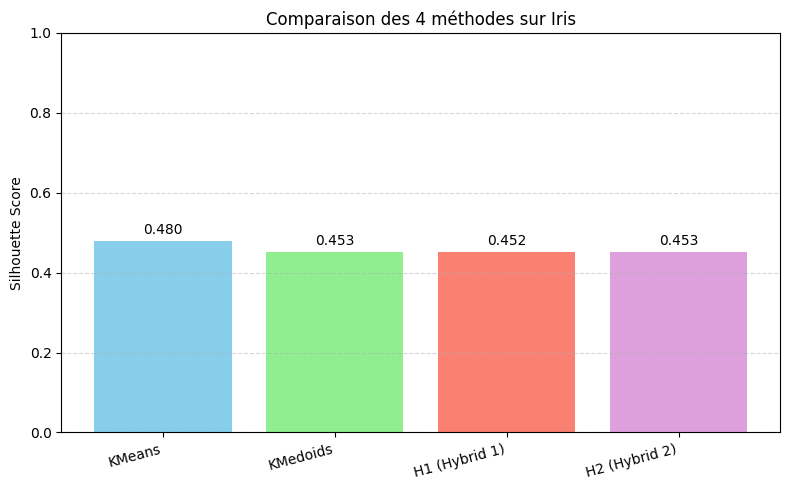

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# --- 1. KMeans ---
def kmeans_clustering(X, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    return model.fit_predict(X)

# --- 2. KMedoids ---
def kmedoids_clustering(X, n_clusters):
    D = calculate_distance_matrix(X)
    init = list(np.random.choice(len(X), n_clusters, replace=False))
    km = kmedoids(D, init, data_type='distance_matrix')
    km.process()
    labels = np.zeros(len(X), dtype=int)
    for cid, pts in enumerate(km.get_clusters()):
        labels[pts] = cid
    return labels

# --- 3. H1: Hybrid KMeans→KMedoids ---
def hybrid_h1(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)

    # 3.1 KMeans locaux
    local_centers = []
    for sub in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
        km.fit(X[sub])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)

    # 3.2 KMedoids sur centres
    D_centers = calculate_distance_matrix(C)
    init = list(np.random.choice(len(C), n_clusters, replace=False))
    km2 = kmedoids(D_centers, init, data_type='distance_matrix')
    km2.process()
    medoid_indices = km2.get_medoids()
    medoids = C[medoid_indices]

    # 3.3 Projection finale : chaque point à son medoid le plus proche
    D_full = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(D_full, axis=1)

# --- 4. H2: KMM (KMeans→Médiane→KMedoids) ---
def hybrid_h2(X, n_clusters, metric='euclidean'):
    # 4.1 KMeans first
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    centroids = km.cluster_centers_
    labels0 = km.labels_

    # 4.2 Trouver les nouveaux medoids
    dist_to_centroids = cdist(X, centroids, metric=metric)
    medoid_idxs = []
    for i in range(n_clusters):
        pts = np.where(labels0 == i)[0]
        if len(pts)==0: continue
        d = dist_to_centroids[pts, i]
        medoid_idxs.append(pts[np.argmin(d)])

    # 4.3 KMedoids complet
    D_full = cdist(X, X, metric=metric)
    km2 = kmedoids(D_full.tolist(), medoid_idxs, data_type='distance_matrix')
    km2.process()
    labels = np.zeros(len(X), dtype=int)
    for cid, pts in enumerate(km2.get_clusters()):
        labels[pts] = cid
    return labels

# --- Chargement et standardisation ---
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
n_clusters = 3

# --- Calcul des labels ---
labels = {
    'KMeans': kmeans_clustering(X, n_clusters),
    'KMedoids': kmedoids_clustering(X, n_clusters),
    'H1 (Hybrid 1)': hybrid_h1(X, n_subsets=3, n_clusters=n_clusters),
    'H2 (Hybrid 2)': hybrid_h2(X, n_clusters)
}

# --- Silhouette scores ---
scores = {m: silhouette_score(X, lab) for m, lab in labels.items()}

# --- Affichage ---
methods = list(scores.keys())
vals    = list(scores.values())

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(methods, vals, color=['skyblue','lightgreen','salmon','plum'])
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.3f}",
            ha='center', va='bottom')
ax.set_ylim(0,1)
ax.set_ylabel('Silhouette Score')
ax.set_title('Comparaison des 4 méthodes sur Iris')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


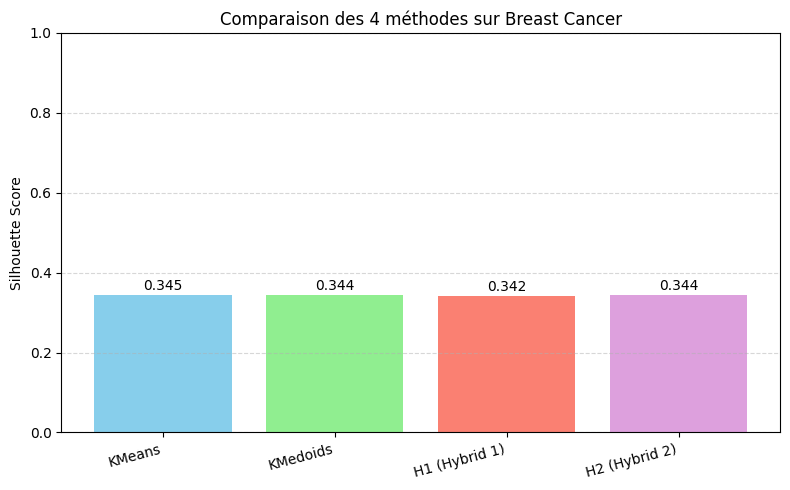

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# --- 1. KMeans ---
def kmeans_clustering(X, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    return model.fit_predict(X)

# --- 2. KMedoids ---
def kmedoids_clustering(X, n_clusters):
    D = calculate_distance_matrix(X)
    init = list(np.random.choice(len(X), n_clusters, replace=False))
    km = kmedoids(D, init, data_type='distance_matrix')
    km.process()
    labels = np.zeros(len(X), dtype=int)
    for cid, pts in enumerate(km.get_clusters()):
        labels[pts] = cid
    return labels

# --- 3. H1: Hybrid KMeans→KMedoids ---
def hybrid_h1(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)

    # 3.1 KMeans locaux
    local_centers = []
    for sub in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
        km.fit(X[sub])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)

    # 3.2 KMedoids sur centres
    D_centers = calculate_distance_matrix(C)
    init = list(np.random.choice(len(C), n_clusters, replace=False))
    km2 = kmedoids(D_centers, init, data_type='distance_matrix')
    km2.process()
    medoid_indices = km2.get_medoids()
    medoids = C[medoid_indices]

    # 3.3 Projection finale : chaque point à son medoid le plus proche
    D_full = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(D_full, axis=1)

# --- 4. H2: KMM (KMeans→Médiane→KMedoids) ---
def hybrid_h2(X, n_clusters, metric='euclidean'):
    # 4.1 KMeans first
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    centroids = km.cluster_centers_
    labels0 = km.labels_

    # 4.2 Trouver les nouveaux medoids
    dist_to_centroids = cdist(X, centroids, metric=metric)
    medoid_idxs = []
    for i in range(n_clusters):
        pts = np.where(labels0 == i)[0]
        if len(pts)==0: continue
        d = dist_to_centroids[pts, i]
        medoid_idxs.append(pts[np.argmin(d)])

    # 4.3 KMedoids complet
    D_full = cdist(X, X, metric=metric)
    km2 = kmedoids(D_full.tolist(), medoid_idxs, data_type='distance_matrix')
    km2.process()
    labels = np.zeros(len(X), dtype=int)
    for cid, pts in enumerate(km2.get_clusters()):
        labels[pts] = cid
    return labels

# --- Chargement et standardisation ---
bc = load_breast_cancer()
X = StandardScaler().fit_transform(bc.data)
# 2 classes : malignant / benign
n_clusters = 2

# --- Calcul des labels pour chaque méthode ---
labels = {
    'KMeans': kmeans_clustering(X, n_clusters),
    'KMedoids': kmedoids_clustering(X, n_clusters),
    'H1 (Hybrid 1)': hybrid_h1(X, n_subsets=3, n_clusters=n_clusters),
    'H2 (Hybrid 2)': hybrid_h2(X, n_clusters)
}

# --- Calcul des scores silhouette ---
scores = {m: silhouette_score(X, lab) for m, lab in labels.items()}

# --- Affichage graphique avec valeurs ---
methods = list(scores.keys())
vals    = list(scores.values())

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(methods, vals, color=['skyblue','lightgreen','salmon','plum'])
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.005, f"{h:.3f}",
            ha='center', va='bottom')
ax.set_ylim(0,1)
ax.set_ylabel('Silhouette Score')
ax.set_title('Comparaison des 4 méthodes sur Breast Cancer')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


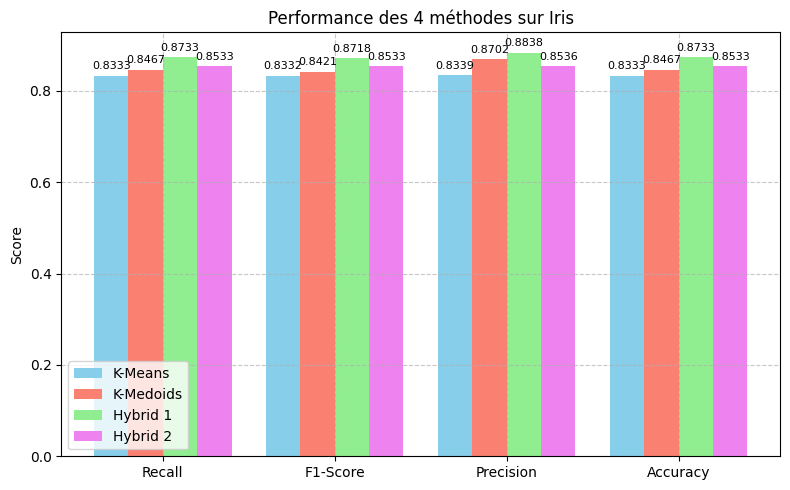

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# -------------------
# Fonctions utilitaires
# -------------------

def match_labels(true_labels, cluster_labels):
    # Aligne les labels de clusters aux labels vrais via affectation linéaire
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    return np.vectorize(lambda x: mapping[x])(cluster_labels)


def compute_metrics(y_true, y_pred):
    return {
        'Recall':    recall_score(y_true, y_pred, average='macro'),
        'F1-Score':  f1_score(y_true, y_pred, average='macro'),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Accuracy':  accuracy_score(y_true, y_pred)
    }

# -------------------
# PAM (K-Medoids) implémentation
# -------------------

def pam(X, k, metric='cityblock', max_iter=100):
    medoid_idxs = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_idxs]
    for _ in range(max_iter):
        D = cdist(X, medoids, metric=metric)
        labels = np.argmin(D, axis=1)
        new_medoids = []
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                new_medoids.append(medoids[i])
            else:
                dist_mat = cdist(cluster_pts, cluster_pts, metric=metric)
                new_medoids.append(cluster_pts[np.argmin(dist_mat.sum(axis=1))])
        new_medoids = np.vstack(new_medoids)
        if np.allclose(new_medoids, medoids):
            break
        medoids = new_medoids
    return medoids, labels


def kmedoids_cityblock(X, n_clusters):
    medoids, _ = pam(X, n_clusters, metric='cityblock')
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Hybrid 1: sous-ensembles → KMeans puis PAM
# -------------------

def hybrid_subsets(X, n_clusters, n_subsets=3):
    idx = np.random.permutation(len(X))
    subsets = np.array_split(idx, n_subsets)
    centers = []
    for sub in subsets:
        km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X[sub])
        centers.append(km.cluster_centers_)
    combined = np.vstack(centers)
    medoids, _ = pam(combined, n_clusters, metric='cityblock')
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Hybrid 2: KMeans → remplacement centroïdes → PAM
# -------------------

def hybrid_centroid_replacement(X, n_clusters):
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
    medoids = []
    for i in range(n_clusters):
        pts = X[km.labels_ == i]
        if len(pts):
            medoids.append(pts[np.argmin(cdist([km.cluster_centers_[i]], pts, metric='euclidean'))])
    medoids = np.vstack(medoids)
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Chargement Iris & mise à l'échelle
# -------------------

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = iris.target

# -------------------
# Exécution & alignement labels
# -------------------

methods = {
    'K-Means':    lambda X: match_labels(y, KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X)),
    'K-Medoids':  lambda X: match_labels(y, kmedoids_cityblock(X, 3)),
    'Hybrid 1':   lambda X: match_labels(y, hybrid_subsets(X, 3)),
    'Hybrid 2':   lambda X: match_labels(y, hybrid_centroid_replacement(X, 3)),
}

results = {name: compute_metrics(y, fn(X)) for name, fn in methods.items()}

# -------------------
# Affichage avec couleurs et labels exacts
# -------------------

metrics = list(results['K-Means'].keys())
x = np.arange(len(metrics))
width = 0.2
colors = ['skyblue', 'salmon', 'lightgreen', 'violet']

fig, ax = plt.subplots(figsize=(8, 5))
for i, (name, met) in enumerate(results.items()):
    rects = ax.bar(x + (i - 1.5)*width, list(met.values()), width, label=name, color=colors[i])
    # labels exacts au-dessus de chaque barre
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Performance des 4 méthodes sur Iris')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


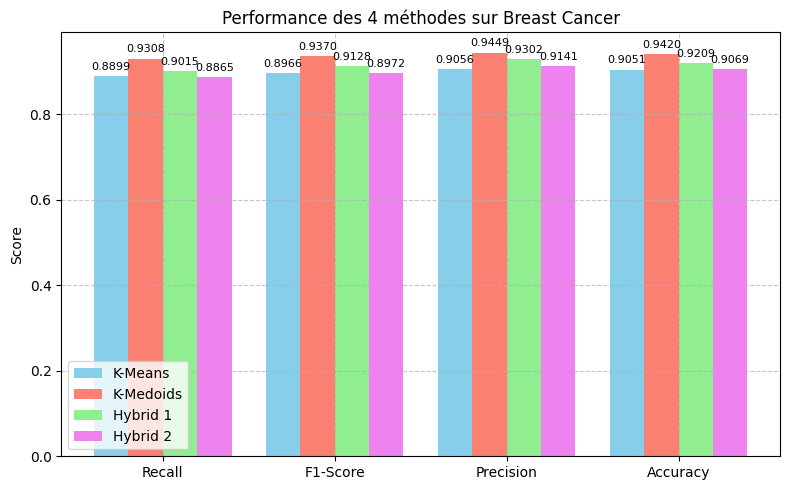

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# -------------------
# Fonctions utilitaires
# -------------------

def match_labels(true_labels, cluster_labels):
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    return np.vectorize(lambda x: mapping[x])(cluster_labels)

def compute_metrics(y_true, y_pred):
    return {
        'Recall':    recall_score(y_true, y_pred, average='macro'),
        'F1-Score':  f1_score(y_true, y_pred, average='macro'),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Accuracy':  accuracy_score(y_true, y_pred)
    }

# -------------------
# PAM (K-Medoids) implémentation
# -------------------

def pam(X, k, metric='cityblock', max_iter=100):
    medoid_idxs = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_idxs]
    for _ in range(max_iter):
        D = cdist(X, medoids, metric=metric)
        labels = np.argmin(D, axis=1)
        new_medoids = []
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                new_medoids.append(medoids[i])
            else:
                dist_mat = cdist(cluster_pts, cluster_pts, metric=metric)
                new_medoids.append(cluster_pts[np.argmin(dist_mat.sum(axis=1))])
        new_medoids = np.vstack(new_medoids)
        if np.allclose(new_medoids, medoids):
            break
        medoids = new_medoids
    return medoids, labels

def kmedoids_cityblock(X, n_clusters):
    medoids, _ = pam(X, n_clusters, metric='cityblock')
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Hybrid 1: sous-ensembles → KMeans puis PAM
# -------------------

def hybrid_subsets(X, n_clusters, n_subsets=3):
    idx = np.random.permutation(len(X))
    subsets = np.array_split(idx, n_subsets)
    centers = []
    for sub in subsets:
        km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X[sub])
        centers.append(km.cluster_centers_)
    combined = np.vstack(centers)
    medoids, _ = pam(combined, n_clusters, metric='cityblock')
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Hybrid 2: KMeans → remplacement centroïdes → PAM
# -------------------

def hybrid_centroid_replacement(X, n_clusters):
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
    medoids = []
    for i in range(n_clusters):
        pts = X[km.labels_ == i]
        if len(pts):
            # distance euclidienne pour choisir le point le plus proche du centroïde
            medoids.append(pts[np.argmin(cdist([km.cluster_centers_[i]], pts, metric='euclidean'))])
    medoids = np.vstack(medoids)
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Chargement Breast Cancer & mise à l'échelle
# -------------------

bc = load_breast_cancer()
X = StandardScaler().fit_transform(bc.data)
y = bc.target
n_clusters = 2

# -------------------
# Exécution & alignement labels
# -------------------

methods = {
    'K-Means':    lambda X: match_labels(y, KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit_predict(X)),
    'K-Medoids':  lambda X: match_labels(y, kmedoids_cityblock(X, n_clusters)),
    'Hybrid 1':   lambda X: match_labels(y, hybrid_subsets(X, n_clusters)),
    'Hybrid 2':   lambda X: match_labels(y, hybrid_centroid_replacement(X, n_clusters)),
}

results = {name: compute_metrics(y, fn(X)) for name, fn in methods.items()}

# -------------------
# Affichage avec couleurs et labels exacts
# -------------------

metrics = list(results['K-Means'].keys())
x = np.arange(len(metrics))
width = 0.2
colors = ['skyblue', 'salmon', 'lightgreen', 'violet']

fig, ax = plt.subplots(figsize=(8, 5))
for i, (name, met) in enumerate(results.items()):
    rects = ax.bar(x + (i - 1.5)*width, list(met.values()), width, label=name, color=colors[i])
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Performance des 4 méthodes sur Breast Cancer')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


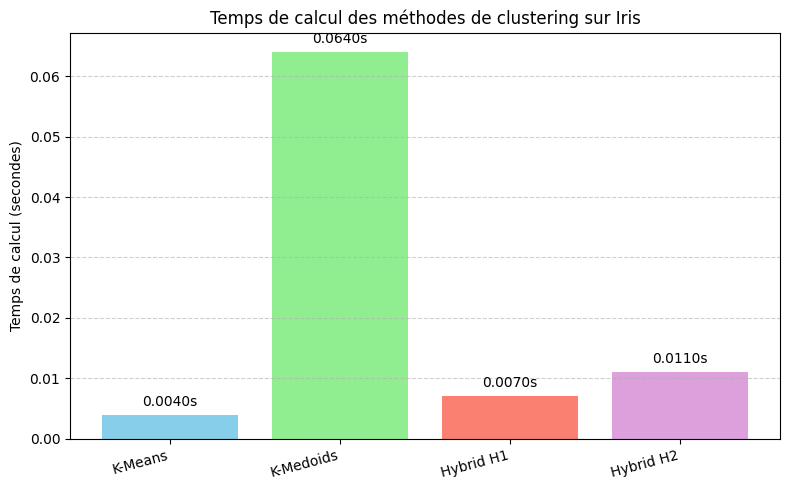

In [46]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# -------------------
# Implémentations des méthodes
# -------------------

def time_kmeans(X, n_clusters):
    start = time.time()
    _ = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit_predict(X)
    return time.time() - start

def time_kmedoids(X, n_clusters):
    start = time.time()
    D = calculate_distance_matrix(X)
    init = list(np.random.choice(len(X), n_clusters, replace=False))
    km = kmedoids(D, init, data_type='distance_matrix')
    km.process()
    _ = km.get_clusters()
    return time.time() - start

def time_hybrid_h1(X, n_subsets, n_clusters):
    start = time.time()
    # 1) sous-ensembles + KMeans
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    local_centers = []
    for sub in splits:
        km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X[sub])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)
    # 2) KMedoids sur centres
    D_c = calculate_distance_matrix(C)
    init = list(np.random.choice(len(C), n_clusters, replace=False))
    km2 = kmedoids(D_c, init, data_type='distance_matrix')
    km2.process()
    medoids = C[km2.get_medoids()]
    # 3) projection finale
    _ = np.argmin(np.linalg.norm(X[:, None] - medoids[None, :], axis=2), axis=1)
    return time.time() - start

def time_hybrid_h2(X, n_clusters):
    start = time.time()
    # 1) KMeans
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    centroids = km.cluster_centers_
    labels0 = km.labels_
    # 2) remplacement centroïdes
    new_medoids = []
    dist_to_centroids = cdist(X, centroids)
    for i in range(n_clusters):
        pts = np.where(labels0 == i)[0]
        if len(pts):
            new_medoids.append(pts[np.argmin(dist_to_centroids[pts, i])])
    # 3) KMedoids complet
    D_full = cdist(X, X)
    km2 = kmedoids(D_full.tolist(), new_medoids, data_type='distance_matrix')
    km2.process()
    _ = km2.get_clusters()
    return time.time() - start

# -------------------
# Chargement & préparation Iris
# -------------------

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
n_clusters = 3

# -------------------
# Mesure des temps
# -------------------

times = {
    'K-Means':    time_kmeans(X, n_clusters),
    'K-Medoids':  time_kmedoids(X, n_clusters),
    'Hybrid H1':  time_hybrid_h1(X, n_subsets=3, n_clusters=n_clusters),
    'Hybrid H2':  time_hybrid_h2(X, n_clusters)
}

# -------------------
# Affichage graphique
# -------------------

methods = list(times.keys())
values  = list(times.values())

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(methods, values, color=['skyblue','lightgreen','salmon','plum'])
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.001, f"{h:.4f}s",
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Temps de calcul (secondes)')
ax.set_title('Temps de calcul des méthodes de clustering sur Iris')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


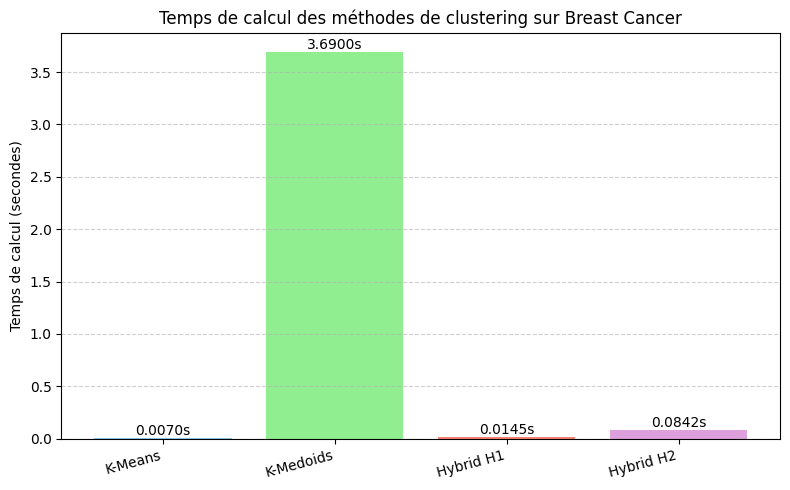

In [50]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# -------------------
# Mesure du temps d'exécution pour chaque méthode
# -------------------

def time_kmeans(X, n_clusters):
    start = time.time()
    _ = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit_predict(X)
    return time.time() - start

def time_kmedoids(X, n_clusters):
    start = time.time()
    D = calculate_distance_matrix(X)
    init = list(np.random.choice(len(X), n_clusters, replace=False))
    km = kmedoids(D, init, data_type='distance_matrix')
    km.process()
    _ = km.get_clusters()
    return time.time() - start

def time_hybrid_h1(X, n_subsets, n_clusters):
    start = time.time()
    # 1) sous-ensembles + KMeans
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)
    local_centers = []
    for sub in splits:
        km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X[sub])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)
    # 2) KMedoids sur centres
    D_c = calculate_distance_matrix(C)
    init = list(np.random.choice(len(C), n_clusters, replace=False))
    km2 = kmedoids(D_c, init, data_type='distance_matrix')
    km2.process()
    medoids = C[km2.get_medoids()]
    # 3) projection finale
    _ = np.argmin(np.linalg.norm(X[:, None] - medoids[None, :], axis=2), axis=1)
    return time.time() - start

def time_hybrid_h2(X, n_clusters):
    start = time.time()
    # 1) KMeans
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    centroids = km.cluster_centers_
    labels0 = km.labels_
    # 2) remplacement centroïdes
    new_medoids = []
    dist_to_centroids = cdist(X, centroids)
    for i in range(n_clusters):
        pts = np.where(labels0 == i)[0]
        if len(pts):
            new_medoids.append(pts[np.argmin(dist_to_centroids[pts, i])])
    # 3) KMedoids complet
    D_full = cdist(X, X)
    km2 = kmedoids(D_full.tolist(), new_medoids, data_type='distance_matrix')
    km2.process()
    _ = km2.get_clusters()
    return time.time() - start

# -------------------
# Chargement & préparation Breast Cancer
# -------------------

bc = load_breast_cancer()
X = StandardScaler().fit_transform(bc.data)
n_clusters = 2

# -------------------
# Mesures des temps
# -------------------

times = {
    'K-Means':    time_kmeans(X, n_clusters),
    'K-Medoids':  time_kmedoids(X, n_clusters),
    'Hybrid H1':  time_hybrid_h1(X, n_subsets=3, n_clusters=n_clusters),
    'Hybrid H2':  time_hybrid_h2(X, n_clusters)
}

# -------------------
# Affichage graphique
# -------------------

methods = list(times.keys())
values  = list(times.values())

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(methods, values, color=['skyblue','lightgreen','salmon','plum'])
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.001, f"{h:.4f}s",
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Temps de calcul (secondes)')
ax.set_title('Temps de calcul des méthodes de clustering sur Breast Cancer')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


Running KMeans...
Running Hybrid H1...


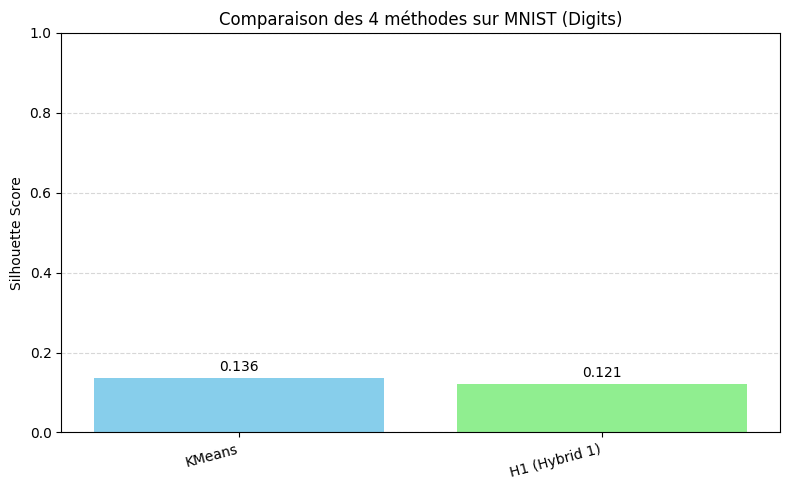

KMeans: Silhouette Score = 0.136
H1 (Hybrid 1): Silhouette Score = 0.121


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # Using load_digits for smaller MNIST
# from sklearn.datasets import fetch_openml  # Uncomment to use full MNIST
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# --- 1. KMeans ---
def kmeans_clustering(X, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    return model.fit_predict(X)

# --- 2. KMedoids ---
def kmedoids_clustering(X, n_clusters):
    D = calculate_distance_matrix(X)
    init = list(np.random.choice(len(X), n_clusters, replace=False))
    km = kmedoids(D, init, data_type='distance_matrix')
    km.process()
    labels = np.zeros(len(X), dtype=int)
    for cid, pts in enumerate(km.get_clusters()):
        labels[pts] = cid
    return labels

# --- 3. H1: Hybrid KMeans→KMedoids ---
def hybrid_h1(X, n_subsets, n_clusters, random_state=0):
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    splits = np.array_split(idx, n_subsets)

    # 3.1 KMeans locaux
    local_centers = []
    for sub in splits:
        km = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
        km.fit(X[sub])
        local_centers.append(km.cluster_centers_)
    C = np.vstack(local_centers)

    # 3.2 KMedoids sur centres
    D_centers = calculate_distance_matrix(C)
    init = list(np.random.choice(len(C), n_clusters, replace=False))
    km2 = kmedoids(D_centers, init, data_type='distance_matrix')
    km2.process()
    medoid_indices = km2.get_medoids()
    medoids = C[medoid_indices]

    # 3.3 Projection finale : chaque point à son medoid le plus proche
    D_full = np.linalg.norm(X[:, None] - medoids[None, :], axis=2)
    return np.argmin(D_full, axis=1)

# --- 4. H2: KMM (KMeans→Médiane→KMedoids) ---
def hybrid_h2(X, n_clusters, metric='euclidean'):
    # 4.1 KMeans first
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    centroids = km.cluster_centers_
    labels0 = km.labels_

    # 4.2 Trouver les nouveaux medoids
    dist_to_centroids = cdist(X, centroids, metric=metric)
    medoid_idxs = []
    for i in range(n_clusters):
        pts = np.where(labels0 == i)[0]
        if len(pts) == 0:
            continue
        d = dist_to_centroids[pts, i]
        medoid_idxs.append(pts[np.argmin(d)])

    # 4.3 KMedoids complet
    D_full = cdist(X, X, metric=metric)
    km2 = kmedoids(D_full.tolist(), medoid_idxs, data_type='distance_matrix')
    km2.process()
    labels = np.zeros(len(X), dtype=int)
    for cid, pts in enumerate(km2.get_clusters()):
        labels[pts] = cid
    return labels

# --- Chargement et standardisation ---
# Load the smaller MNIST dataset (load_digits)
digits = load_digits()
X = digits.data  # Shape: (1797, 64)
n_clusters = 10  # 10 digits (0-9)

# If you want to use the full MNIST dataset, uncomment the following:
# mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# X = mnist.data  # Shape: (70000, 784)
# n_clusters = 10  # 10 digits (0-9)

# Standardize the data
X = StandardScaler().fit_transform(X)

# --- Calcul des labels ---
# We'll call KMedoids last since it takes a long time
labels = {}
print("Running KMeans...")
labels['KMeans'] = kmeans_clustering(X, n_clusters)
print("Running Hybrid H1...")
labels['H1 (Hybrid 1)'] = hybrid_h1(X, n_subsets=3, n_clusters=n_clusters)


# --- Silhouette scores ---
scores = {m: silhouette_score(X, lab) for m, lab in labels.items()}

# --- Affichage ---
methods = list(scores.keys())
vals = list(scores.values())

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(methods, vals, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.3f}",
            ha='center', va='bottom')
ax.set_ylim(0, 1)
ax.set_ylabel('Silhouette Score')
ax.set_title('Comparaison des 4 méthodes sur MNIST (Digits)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# Print silhouette scores for reference
for method, score in scores.items():
    print(f"{method}: Silhouette Score = {score:.3f}")

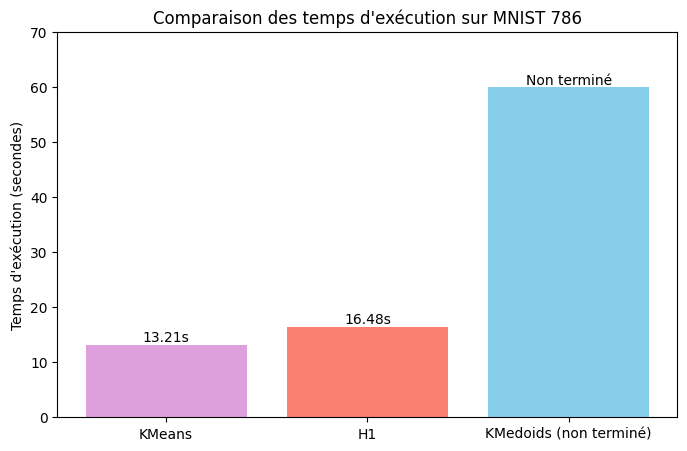

In [8]:
import matplotlib.pyplot as plt

# Données
algorithmes = ['KMeans', 'H1', 'KMedoids']
temps_execution = [13.21, 16.48, None]  # None pour "ne finit pas"

# Remplacer None par un temps fictif élevé pour l'affichage, par exemple 60 secondes
temps_affiche = [t if t is not None else 60 for t in temps_execution]
labels = ['KMeans', 'H1', 'KMedoids (non terminé)']

# Tracer
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, temps_affiche, color=['plum', 'salmon', 'skyblue'])

# Annoter les barres
for bar, temps in zip(bars, temps_execution):
    height = bar.get_height()
    if temps is not None:
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{temps:.2f}s', ha='center', va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width()/2.0, height, 'Non terminé', ha='center', va='bottom')

plt.ylabel('Temps d\'exécution (secondes)')
plt.title('Comparaison des temps d\'exécution sur MNIST 786')
plt.ylim(0, 70)
plt.show()


c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rizd\Desktop\Odyssey\MLTP2\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


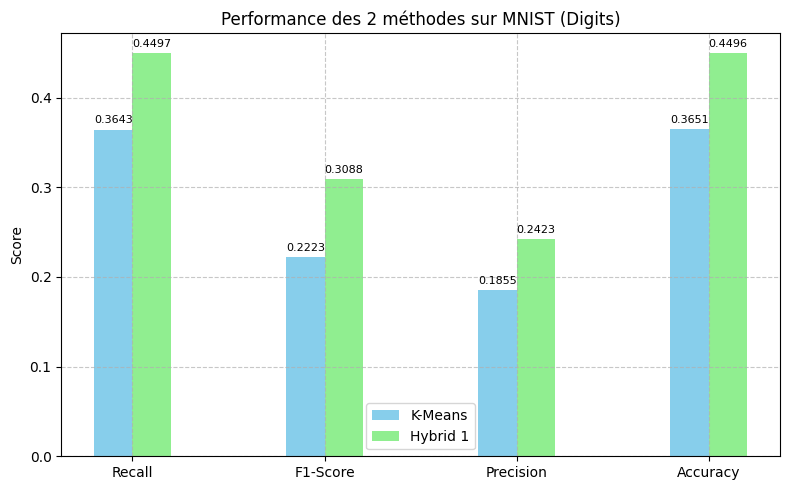


K-Means:
  Recall: 0.3643
  F1-Score: 0.2223
  Precision: 0.1855
  Accuracy: 0.3651

Hybrid 1:
  Recall: 0.4497
  F1-Score: 0.3088
  Precision: 0.2423
  Accuracy: 0.4496


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # Using load_digits for smaller MNIST
# from sklearn.datasets import fetch_openml  # Uncomment to use full MNIST
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# -------------------
# Fonctions utilitaires
# -------------------

def match_labels(true_labels, cluster_labels):
    cm = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    return np.vectorize(lambda x: mapping[x])(cluster_labels)

def compute_metrics(y_true, y_pred):
    return {
        'Recall':    recall_score(y_true, y_pred, average='macro'),
        'F1-Score':  f1_score(y_true, y_pred, average='macro'),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Accuracy':  accuracy_score(y_true, y_pred)
    }

# -------------------
# Hybrid 1: sous-ensembles → KMeans puis PAM
# -------------------

def pam(X, k, metric='cityblock', max_iter=100):
    medoid_idxs = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_idxs]
    for _ in range(max_iter):
        D = cdist(X, medoids, metric=metric)
        labels = np.argmin(D, axis=1)
        new_medoids = []
        for i in range(k):
            cluster_pts = X[labels == i]
            if len(cluster_pts) == 0:
                new_medoids.append(medoids[i])
            else:
                dist_mat = cdist(cluster_pts, cluster_pts, metric=metric)
                new_medoids.append(cluster_pts[np.argmin(dist_mat.sum(axis=1))])
        new_medoids = np.vstack(new_medoids)
        if np.allclose(new_medoids, medoids):
            break
        medoids = new_medoids
    return medoids, labels

def hybrid_subsets(X, n_clusters, n_subsets=2):
    idx = np.random.permutation(len(X))
    subsets = np.array_split(idx, n_subsets)
    centers = []
    for sub in subsets:
        km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X[sub])
        centers.append(km.cluster_centers_)
    combined = np.vstack(centers)
    medoids, _ = pam(combined, n_clusters, metric='cityblock')
    return np.argmin(cdist(X, medoids, metric='cityblock'), axis=1)

# -------------------
# Chargement MNIST (Digits) & mise à l'échelle
# -------------------

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)  # Shape: (1797, 64)
y = digits.target  # True labels (0-9)
n_clusters = 5 # 10 digits (0-9)

# If you want to use the full MNIST dataset, uncomment the following:
# mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# X = mnist.data[:10000]  # Use first 10,000 samples for faster computation
# y = mnist.target[:10000].astype(int)
# X = StandardScaler().fit_transform(X)
# n_clusters = 10

# -------------------
# Exécution & alignement labels
# -------------------

methods = {
    'K-Means':    lambda X: match_labels(y, KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit_predict(X)),
    'Hybrid 1':   lambda X: match_labels(y, hybrid_subsets(X, n_clusters)),
}

results = {name: compute_metrics(y, fn(X)) for name, fn in methods.items()}

# -------------------
# Affichage avec couleurs et labels exacts
# -------------------

metrics = list(results['K-Means'].keys())
x = np.arange(len(metrics))
width = 0.2
colors = ['skyblue', 'lightgreen']

fig, ax = plt.subplots(figsize=(8, 5))
for i, (name, met) in enumerate(results.items()):
    rects = ax.bar(x + (i - 0.5)*width, list(met.values()), width, label=name, color=colors[i])
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Performance des 2 méthodes sur MNIST (Digits)')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print metrics for reference
for name, met in results.items():
    print(f"\n{name}:")
    for metric, value in met.items():
        print(f"  {metric}: {value:.4f}")